# Non-Specific Amplification Experiments

This document will provide an overview of all of the non-specific amplification experiments that have been performed to date. It will provide a history of the experiment, as well as all of the datasets analyzed.

Some related documents include:
- [2022-12-06 Debugging non-specific amplification experiments All-hands Memo](https://docs.google.com/document/d/1etvttLu6or07Xz4PtaYmMDd1AsOtorF6AWQ6BXr3n5o/edit#)

## 2022-06: Observing Non-Specific Amplification in July 2022 spike-in experiments

In 2022-Q2, the NAO team developed a set of nucleic acid tracers (non-infectious, non-replicating phagemids) that we hoped to use for spike-in and deposition experiments in order to measure the dynamics and sensitivity of wastewater monitoring systems. 

An initial first experiment that we performed in 2022 was to try to construct a linear “calibration curve” of our phagemid tracers in order to assess their stability, dynamic range, and sensitivity in archived wastewater samples. To do this, we spiked in known concentrations of tracers into archived wastewater samples, and then extracted and measured the concentrations of these tracers via qPCR. Our initial experimental results can be seen in Figure 1.


In [544]:
library(tidyverse)
library(tools)
library(readxl)
library(patchwork)
source("/Users/Anjali/NAO/Analysis/qpcrtools_r/plate_setup.R")
source("/Users/Anjali/NAO/Analysis/qpcrtools_r/standard_curve.R")
source("/Users/Anjali/NAO/Analysis/qpcrtools_r/plot_curves.R")

We will start by loading our plate layout, and matching the dilutions with its appropriate concentrations:

In [321]:
spike_in_plate1 <- import_plate("data/2022-06-spikeins/plate_layout.xlsx",sheet=1)
spike_in_plate1 <- d2c_mapping("data/2022-06-spikeins/plate_layout_1_tabular.csv",
                              "data/2022-06-spikeins/dilution_map.xlsx")

New names:
• `` -> `...1`


We used **T1_QS2_010_BC33**, but note that we performed two qPCR assays (one for the 010 barcode, which corresponds to the qPCR barcode for the specific phagemid, and another for the 009 barcode, which is a general purpose qPCR barcode that is common to all phagemids).

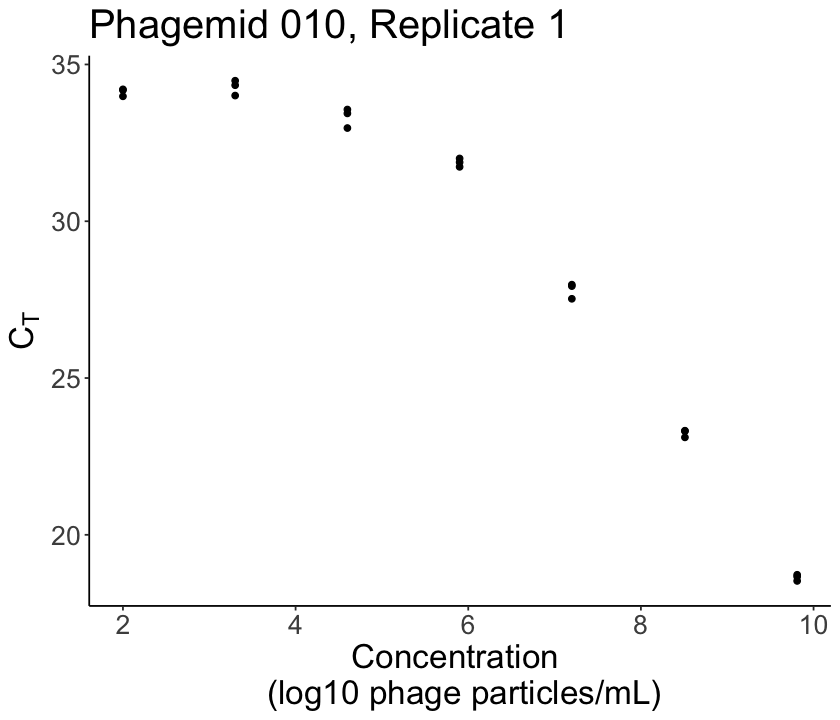

In [322]:
phagemid010_standard_curve <- standard_curve(spike_in_plate1,
                                      spreadsheet="data/2022-06-spikeins/2022-06-29-trip01.xlsx",
                                      sample="Phagemid 010", skip_rows=40)

phagemid010_plot <- standard_curve_plot(phagemid010_standard_curve, 
                                        plot_width = 7, plot_height = 6, 
                                        title="Phagemid 010, Replicate 1", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

phagemid010_plot

We can see here that $< 10^5$ phage particles/mL, the $C_T$ and concentration values start plateauing.

We can try this for some of the other replicates as well: 

New names:
• `` -> `...1`


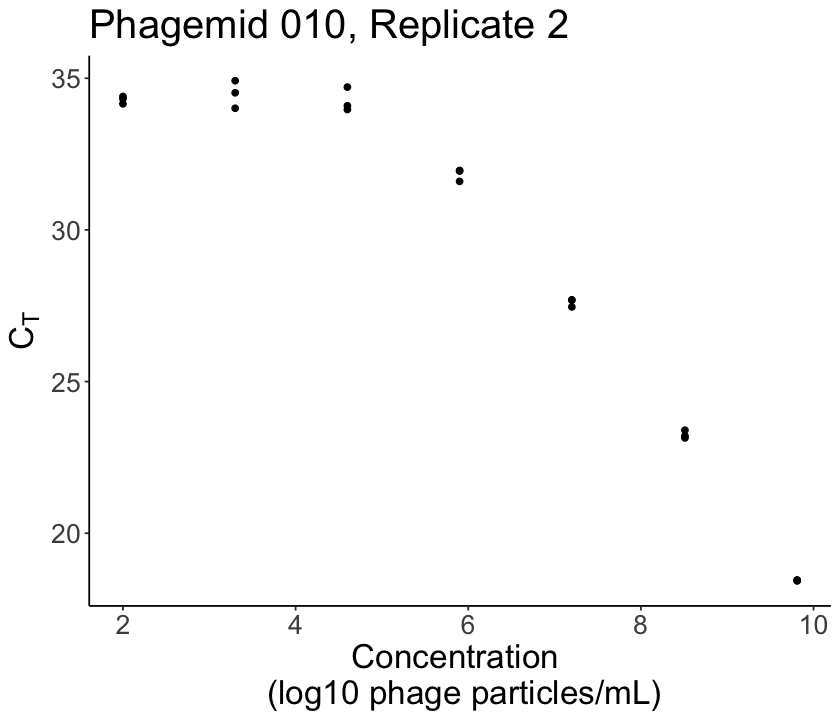

In [323]:
spike_in_plate2 <- import_plate("data/2022-06-spikeins/plate_layout.xlsx",sheet=2)

spike_in_plate2 <- d2c_mapping("data/2022-06-spikeins/plate_layout_2_tabular.csv",
                              "data/2022-06-spikeins/dilution_map.xlsx")

phagemid010_rep2_sc <- standard_curve(spike_in_plate2,
                                      spreadsheet="data/2022-06-spikeins/2022-06-29-trip02.xlsx",
                                      sample="Phagemid 010", skip_rows=40)

phagemid010_rep2_plot <- standard_curve_plot(phagemid010_rep2_sc, 
                                        plot_width = 7, plot_height = 6, 
                                        title="Phagemid 010, Replicate 2", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

phagemid010_rep2_plot

New names:
• `` -> `...1`


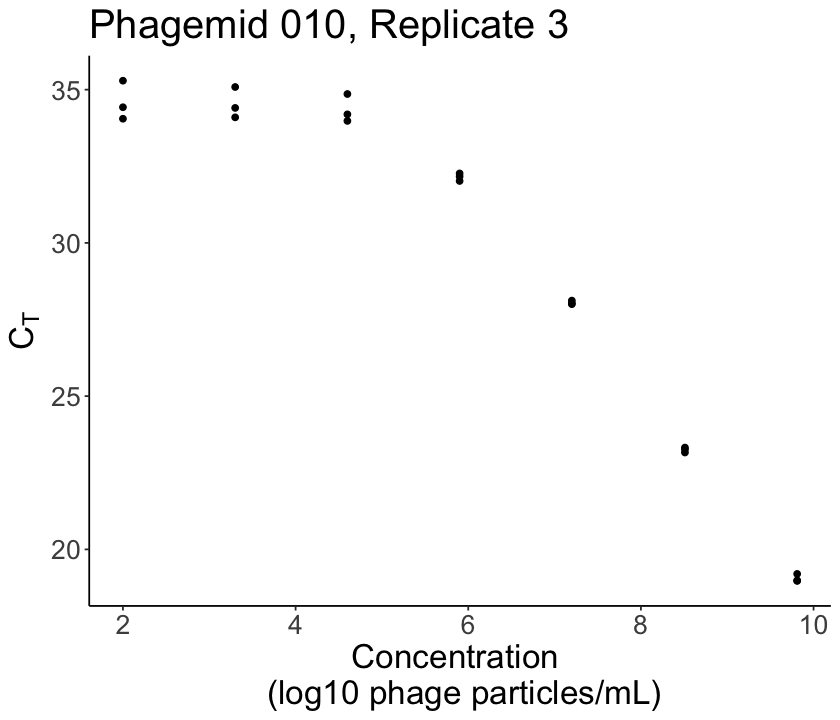

In [324]:
# Note that for replicate 3, we need to use sheet 4

spike_in_plate3 <- import_plate("data/2022-06-spikeins/plate_layout.xlsx",sheet=4)

spike_in_plate3 <- d2c_mapping("data/2022-06-spikeins/plate_layout_4_tabular.csv",
                              "data/2022-06-spikeins/dilution_map.xlsx")

phagemid010_rep3_sc <- standard_curve(spike_in_plate3,
                                      spreadsheet="data/2022-06-spikeins/2022-06-30_trip03.xlsx",
                                      sample="Phagemid 010", skip_rows=40)

phagemid010_rep3_plot <- standard_curve_plot(phagemid010_rep3_sc, 
                                        plot_width = 7, plot_height = 6, 
                                        title="Phagemid 010, Replicate 3", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

phagemid010_rep3_plot

We can also see that these trends are consistent across the 009 barcode as well:

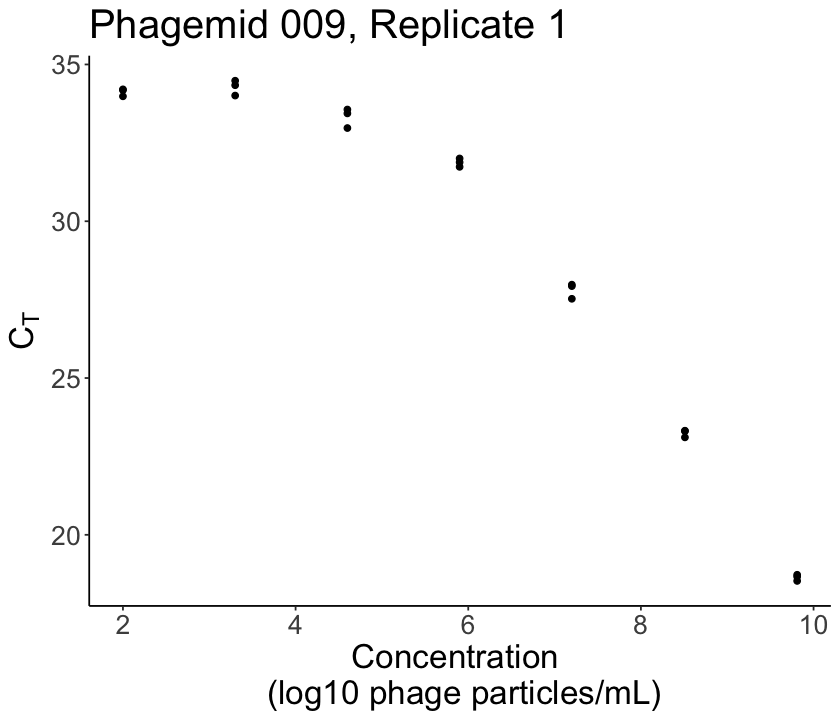

In [325]:
phagemid009_standard_curve <- standard_curve(spike_in_plate1,
                                      spreadsheet="data/2022-06-spikeins/2022-06-29-trip01.xlsx",
                                      sample="Phagemid 009", skip_rows=40)

phagemid009_plot <- standard_curve_plot(phagemid010_standard_curve, 
                                        plot_width = 7, plot_height = 6, 
                                        title="Phagemid 009, Replicate 1", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

phagemid009_plot

New names:
• `` -> `...1`


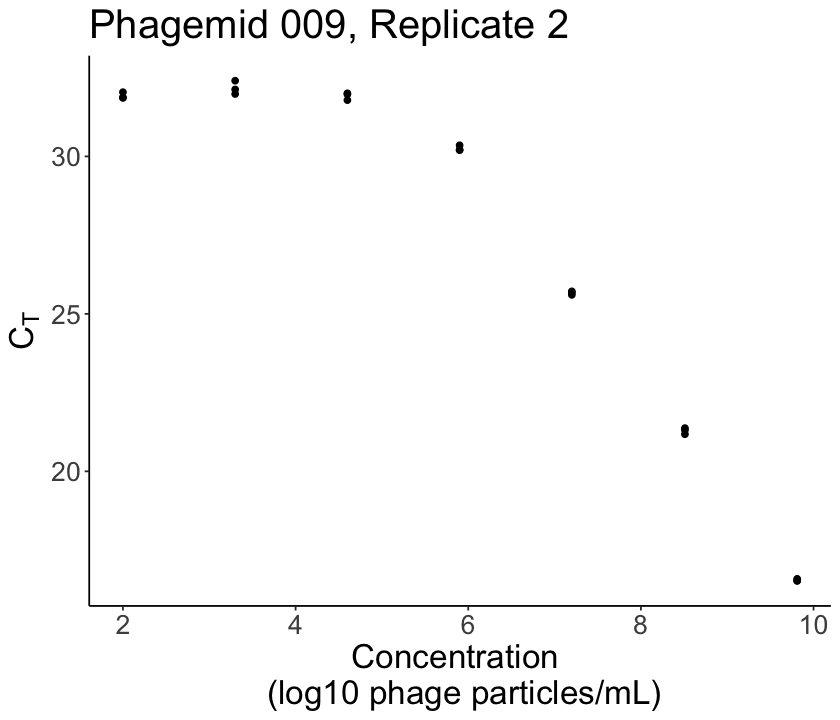

In [331]:
# Note for replicate 2, 009, we need to use sheet 3

spike_in_plate2_009 <- import_plate("data/2022-06-spikeins/plate_layout.xlsx",sheet=3)

spike_in_plate2_009 <- d2c_mapping("data/2022-06-spikeins/plate_layout_3_tabular.csv",
                              "data/2022-06-spikeins/dilution_map.xlsx")

phagemid009_rep2_sc <- standard_curve(spike_in_plate2_009,
                                      spreadsheet="data/2022-06-spikeins/2022-06-30-trip02_009_seq_barcode.xlsx",
                                      sample="Phagemid 009", skip_rows=40)

phagemid009_rep2_plot <- standard_curve_plot(phagemid009_rep2_sc, 
                                        plot_width = 7, plot_height = 6, 
                                        title="Phagemid 009, Replicate 2", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

phagemid009_rep2_plot

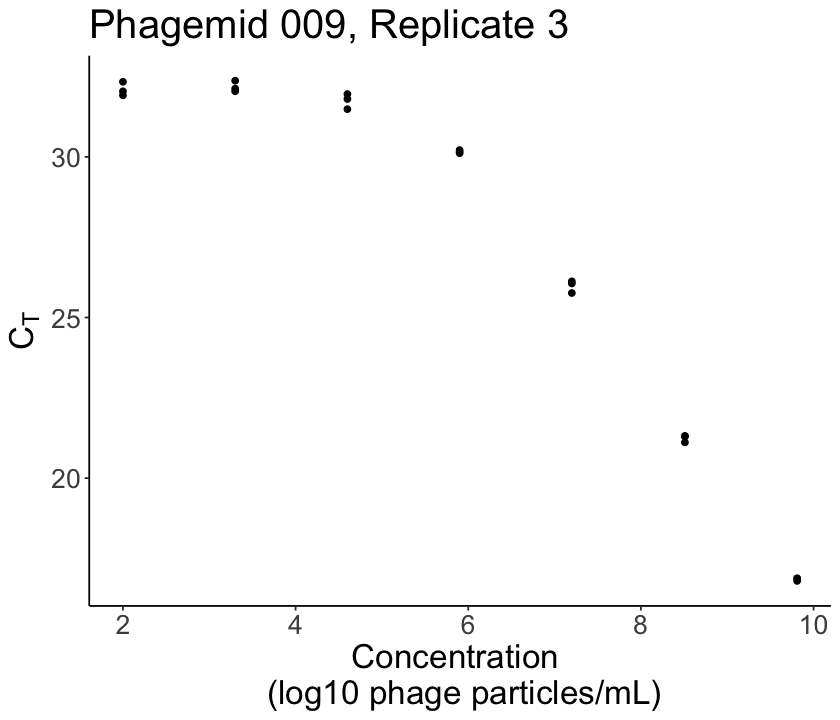

In [332]:
phagemid009_rep3_sc <- standard_curve(spike_in_plate3,
                                      spreadsheet="data/2022-06-spikeins/2022-06-30_trip03.xlsx",
                                      sample="Phagemid 009", skip_rows=40)

phagemid009_rep3_plot <- standard_curve_plot(phagemid009_rep3_sc, 
                                        plot_width = 7, plot_height = 6, 
                                        title="Phagemid 009, Replicate 3", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

phagemid009_rep3_plot

One of the characteristics we wanted to check here was to see what the $C_T$ value of the Negative Controls and NTCs would be. We can extract the well positions of the NTCs:

In [372]:
negs_and_ntcs <- spike_in_plate1 %>% filter(Replicate == "NegCtrl" | Replicate == "NTC") %>% filter(Sample == "Phagemid 010") 

In [373]:
negs_and_ntcs

Replicate,Well.Position,Sample,Concentration
<chr>,<chr>,<chr>,<dbl>
NTC,A2,Phagemid 010,NA
NegCtrl,A3,Phagemid 010,NA
NTC,B2,Phagemid 010,NA
NegCtrl,B3,Phagemid 010,NA
NTC,C2,Phagemid 010,NA
NegCtrl,C3,Phagemid 010,NA


In [370]:
replicate1_results <- read_excel("data/2022-06-spikeins/2022-06-29-trip01.xlsx", 
                                 sheet = "Results", 
                                 skip = 40);
colnames(replicate1_results) <- make.names(colnames(replicate1_results))

In [374]:
merge(x = negs_and_ntcs, y = replicate1_results[c("Well.Position","CT")], by = "Well.Position",)

Well.Position,Replicate,Sample,Concentration,CT
<chr>,<chr>,<chr>,<dbl>,<chr>
A2,NTC,Phagemid 010,NA,Undetermined
A3,NegCtrl,Phagemid 010,NA,35.11927
B2,NTC,Phagemid 010,NA,Undetermined
B3,NegCtrl,Phagemid 010,NA,34.723044999999999
C2,NTC,Phagemid 010,NA,Undetermined
C3,NegCtrl,Phagemid 010,NA,34.371037000000001


We can see here that the negative controls all have $C_T$ values at ~35, which is also the $C_T$ value at which the standard curve starts to plateau. By contrast, the NTCs all have undetermined CT values, suggesting to amplification. 

To see if the amplification in the negative controls is true' amplification, we can plot the curves:

In [352]:
pull(var="Well.Position")

ERROR: Error in UseMethod("pull"): no applicable method for 'pull' applied to an object of class "character"


In [402]:
barcode010_replicate1 <- amp_curves("data/2022-06-spikeins/plate_layout_1_tabular.csv",
                                    "data/2022-06-spikeins/2022-06-29-trip01.xlsx",
                                    skip_rows = 40)

,Well.Position,Well,Cycle,Target.Name,Rn,Delta.Rn,Replicate,Sample,Concentration
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,A1,1,1,Blank,5.125966,-0.22872739,Blank,Phagemid 010,NA
2,A1,1,2,Blank,5.172779,-0.19069314,Blank,Phagemid 010,NA
3,A1,1,3,Blank,5.221941,-0.15030999,Blank,Phagemid 010,NA
4,A1,1,4,Blank,5.282046,-0.09898297,Blank,Phagemid 010,NA
5,A1,1,5,Blank,5.352598,-0.03720987,Blank,Phagemid 010,NA
6,A1,1,6,Blank,5.308616,-0.08997067,Blank,Phagemid 010,NA


In [406]:
barcode010_replicate1$amplification_data <- barcode010_replicate1$amplification_data %>% filter(Replicate == "NegCtrl" | Replicate == "NTC")

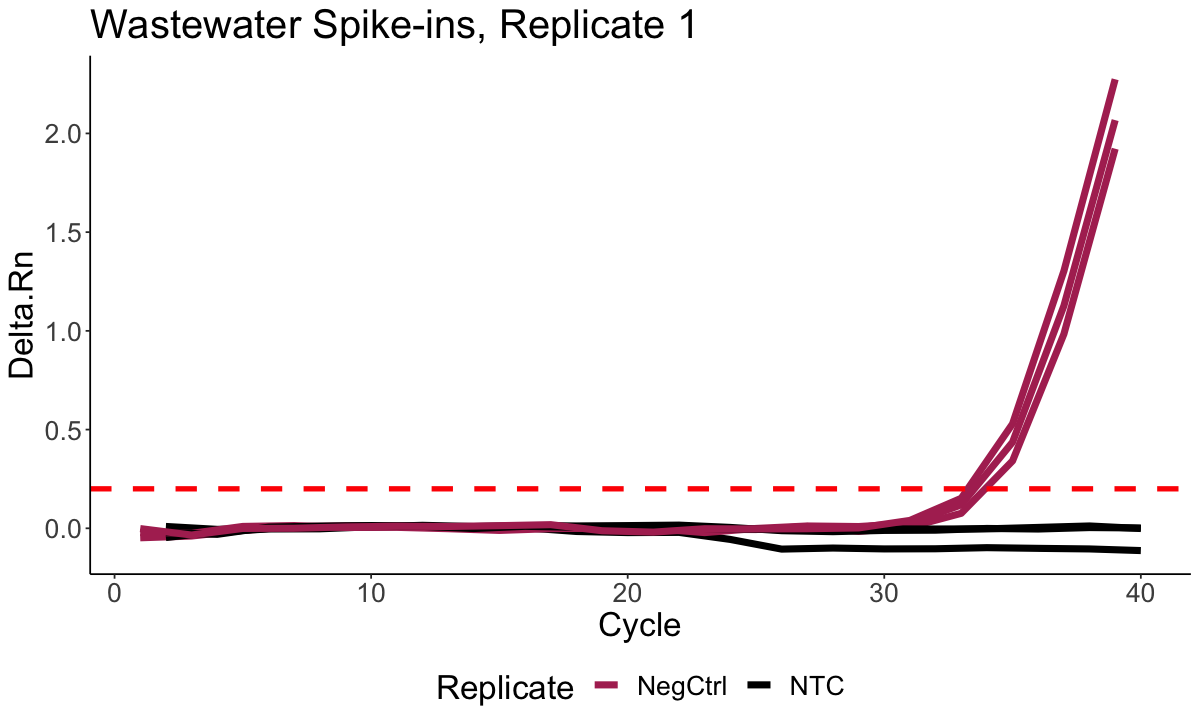

In [418]:
barcode010_replicate1_plot <- curve_plot(barcode010_replicate1, 
                                         samples = c("Phagemid 010"),
                                         replicates = c("NegCtrl","NTC"),
                                         colors = c("Maroon","Black"),
                                         plot_width = 10, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Wastewater Spike-ins, Replicate 1",
                                         legend_position = "bottom",
                                        threshold = 0.2)

barcode010_replicate1_plot

Here, we can see that the NTCs are not amplifying, whereas the negative controls from the wastewater samples are. Thus, we aimed to perform further experiments to assess the problem. In particular, if we use a threshold of 0.2 (note: this was not what was used for calculating the $C_T$ values, but it is still illustrative), we can see that the NTCs do not amplify beyond the 0.2 threshold, whereas the negative controls do.

Based on this, we wish to "debug" what is happening in the negative controls that is leading to this non-specific amplification.

## 2022-11-04: Checking for amplification in wastewater with no phagemids

**Experiment files**: 
- Protocol [here](https://docs.google.com/document/d/1LcDQMtfbUdOIhSkQDTrNQwQfPjAgAU4GQFTLnuY8K58/edit)
- Plate layouts [here](https://docs.google.com/spreadsheets/d/1E9VwmP18xqkY-tl-Iuj994aCKmcetQ3Sv7H0fP4d950/edit#gid=0)
- Raw data [2022-11-04 wastewater amplification](https://drive.google.com/drive/u/0/folders/1xFWOCHzPNgpPWomTaxMlUMYbpkQsdfA8) in [exp5.001](https://drive.google.com/drive/u/0/folders/1-7aum9gPdpGYvuGoojIw_Qflemf9XrHT)


Our first step was to check for amplification of our qPCR primer/probe sets with wastewater, with no phagemids spike-ins. Recall that there were 5 primer/probe sets that were utilized for our phagemid library. These are:
- set 004
- set 007
- set 010
- set 017
- set 018

We performed wastewater extraction (as described [here](https://docs.google.com/document/d/1LcDQMtfbUdOIhSkQDTrNQwQfPjAgAU4GQFTLnuY8K58/edit) -- note that we used a different extraction protocol this time, which is the ultrafiltration + DNA extraction protocol that we expect to use in most of our nucleic acid extraction experiments; this is different from the M13 specific extraction protocol we used in our spike-in experiments from part one) and eluted all of our samples in 30 uL of buffer EB. 

Per probe/probe set:
- we performed 3 wastewater extractions (3 technical replicates) 
- for each wastewater extraction, we performed 3 qPCR replicates
- we also performed 3 NTC qPCR replicates and 3 blanks per primer/probe set

In [424]:
plate_004_007_010 <- import_plate("data/2022-11-04-wastewater-amplification/plate_layout.xlsx",sheet=1)
plate_018_019 <- import_plate("data/2022-11-04-wastewater-amplification/plate_layout.xlsx",sheet=2)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [429]:
data_004_007_010 <- amp_curves(plate_004_007_010,
                                    "data/2022-11-04-wastewater-amplification/2022-11-04-probe_004_007_010.xls",
                                    skip_rows = 42)

data_018_019 <- amp_curves(plate_018_019,
                                    "data/2022-11-04-wastewater-amplification/2022-11-04-probe_018_019.xls",
                                    skip_rows = 42)

### Probe 004

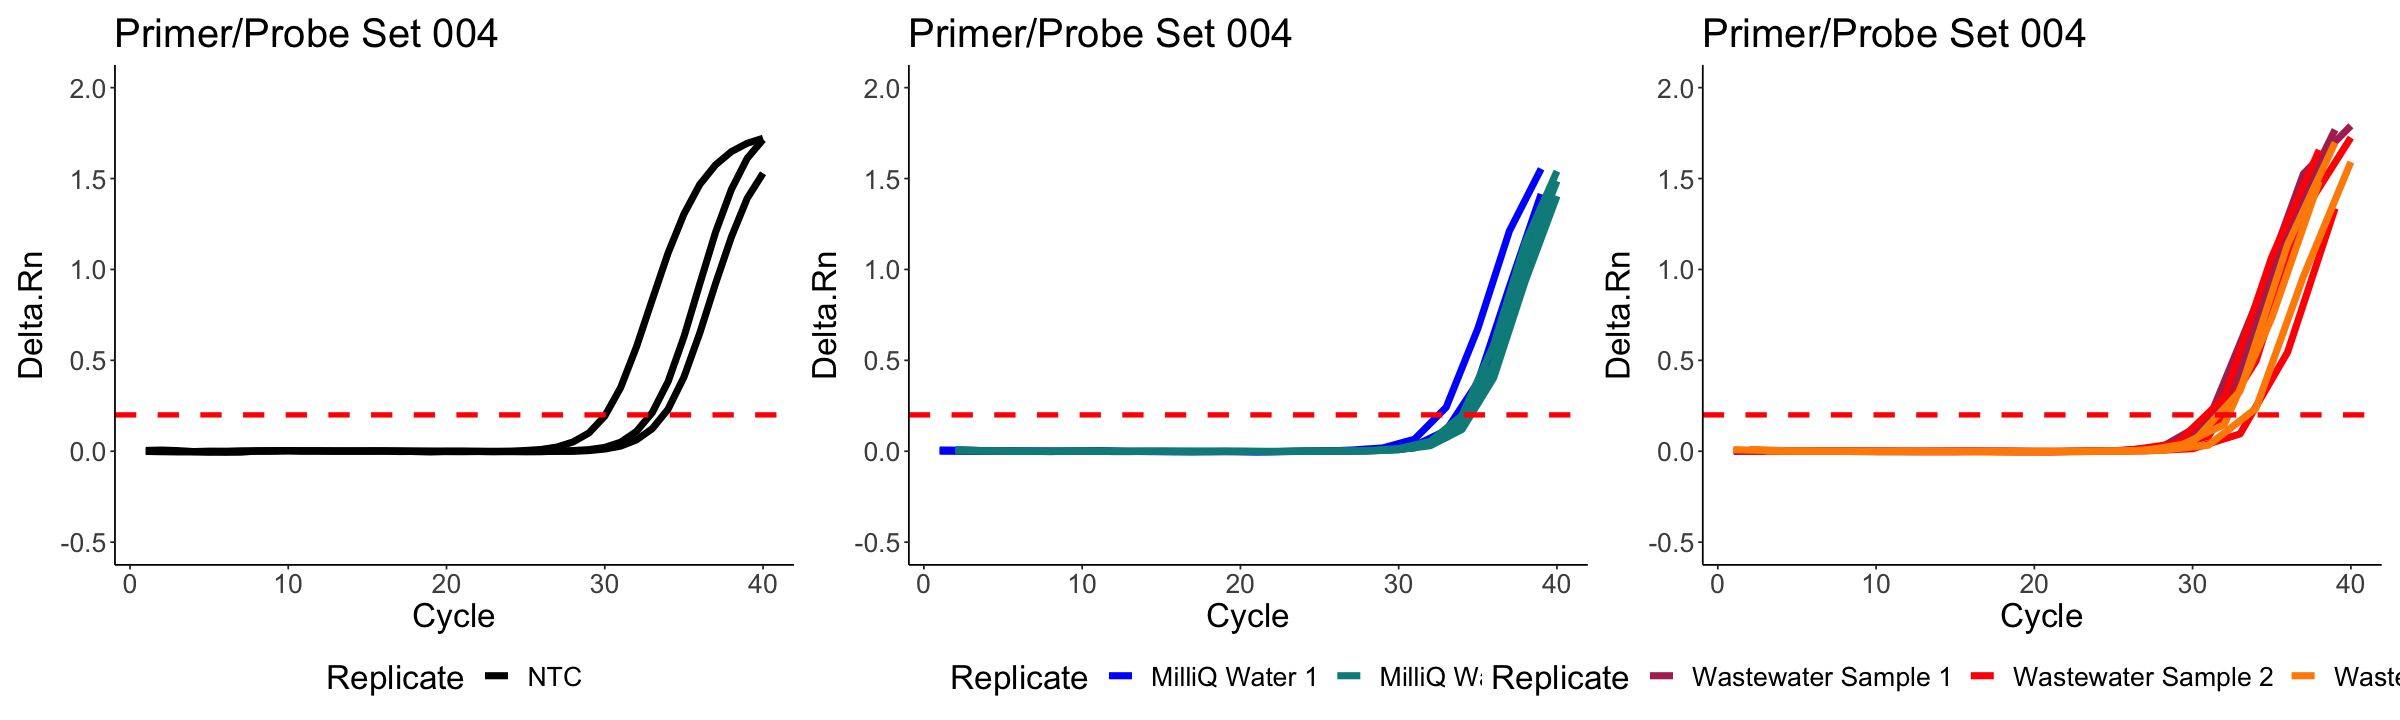

In [496]:
plot_004_milliQ <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 004"),
                                                  replicates = c("MilliQ Water 1", "MilliQ Water 2"),
                                        colors = c("blue","cyan4"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 004",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_004_NTC <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 004"),
                           replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 004",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))


plot_004_WW <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 004"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 004",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_004_NTC + plot_004_milliQ + plot_004_WW

With probe 004, we can see that all samples have an increasae in fluorescence after round ~30, including the NTCs.

### Probe 007

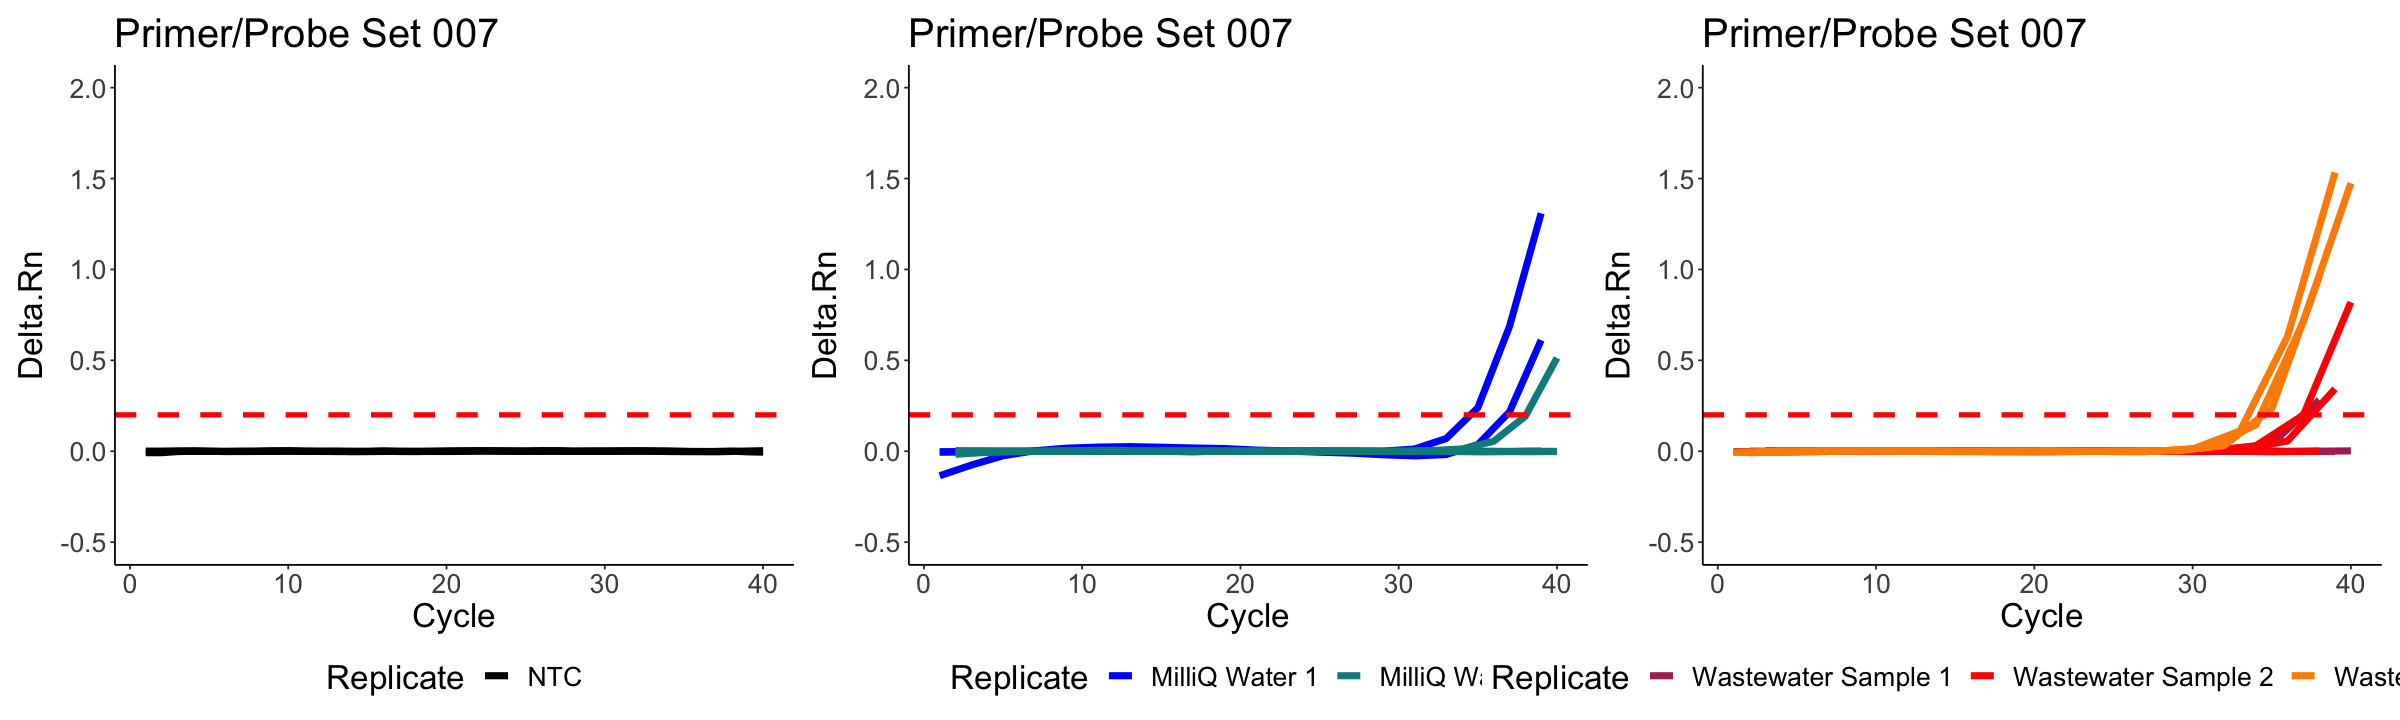

In [497]:
plot_007_milliQ <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 007"),
                                                  replicates = c("MilliQ Water 1", "MilliQ Water 2"),
                                        colors = c("blue","cyan4"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 007",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_007_NTC <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 007"),
                           replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 007",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))


plot_007_WW <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 007"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 007",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_007_NTC + plot_007_milliQ + plot_007_WW

With probe 007, we can see that the NTCs have no non-specific amplification, whereas the MilliQ water and wastewater samples do (though not uniformly across all samples, as was the case with Probe 004).

### Probe 010

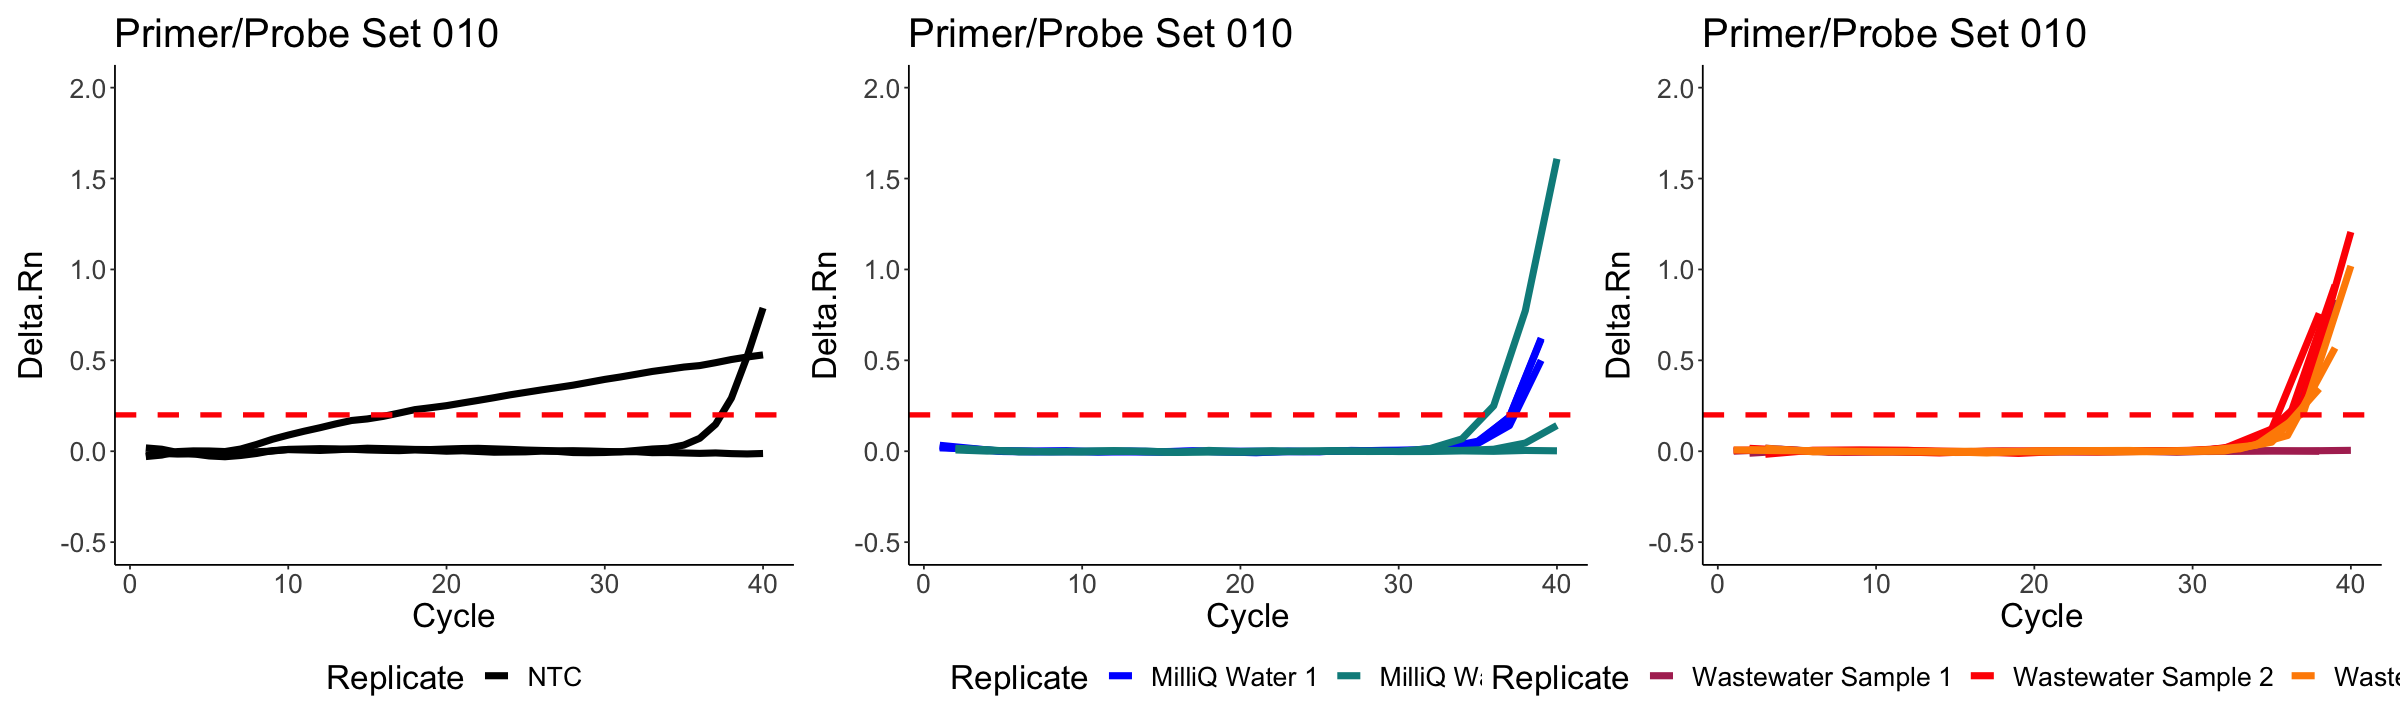

In [498]:
plot_010_milliQ <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 010"),
                                                  replicates = c("MilliQ Water 1", "MilliQ Water 2"),
                                        colors = c("blue","cyan4"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 010",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_010_NTC <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 010"),
                           replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 010",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))


plot_010_WW <- curve_plot(data_004_007_010, 
                                         samples = c("Probe 010"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 010",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_010_NTC + plot_010_milliQ + plot_010_WW

Probe 010 seems to be the most heterogeneous set of samples, with some NTCs, MilliQ, and WW replicates having non-specific amplification, and some not having any.

### Probe 018

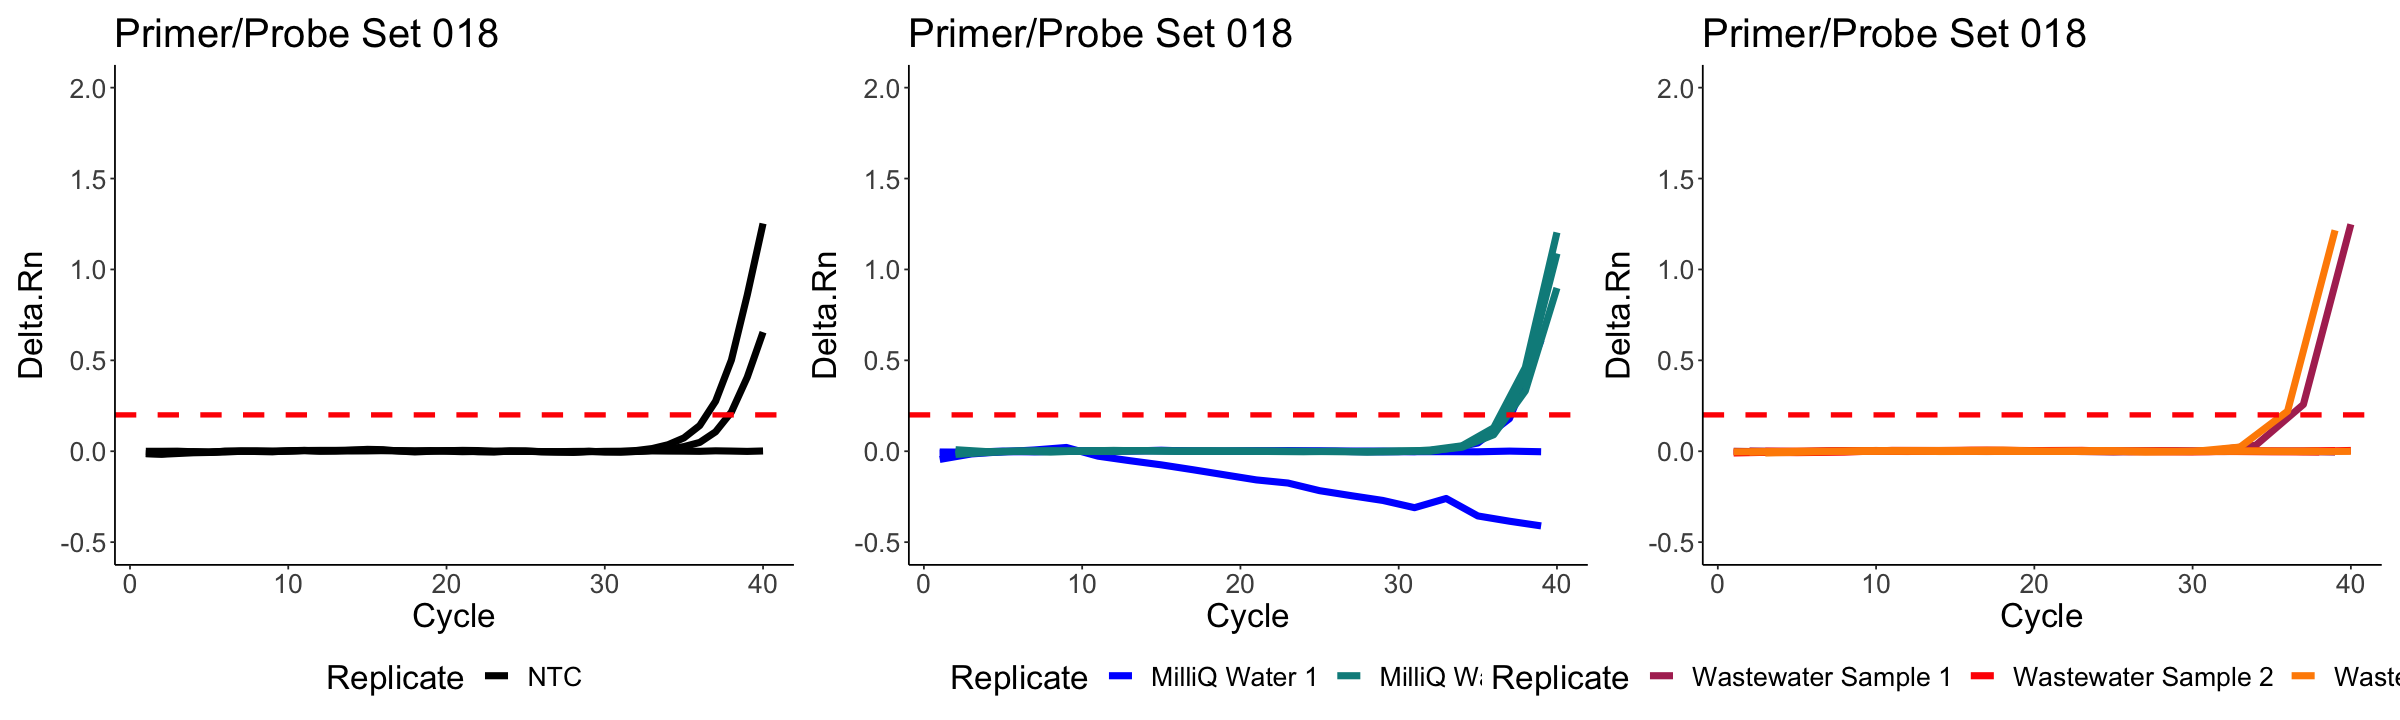

In [499]:
plot_018_milliQ <- curve_plot(data_018_019, 
                                         samples = c("Probe 018"),
                                                  replicates = c("MilliQ Water 1", "MilliQ Water 2"),
                                        colors = c("blue","cyan4"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 018",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_018_NTC <- curve_plot(data_018_019, 
                                         samples = c("Probe 018"),
                           replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 018",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))


plot_018_WW <- curve_plot(data_018_019, 
                                         samples = c("Probe 018"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 018",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,2))

plot_018_NTC + plot_018_milliQ + plot_018_WW

Probe 018 seems as heterogeneous as Probe 010.

### Probe 019

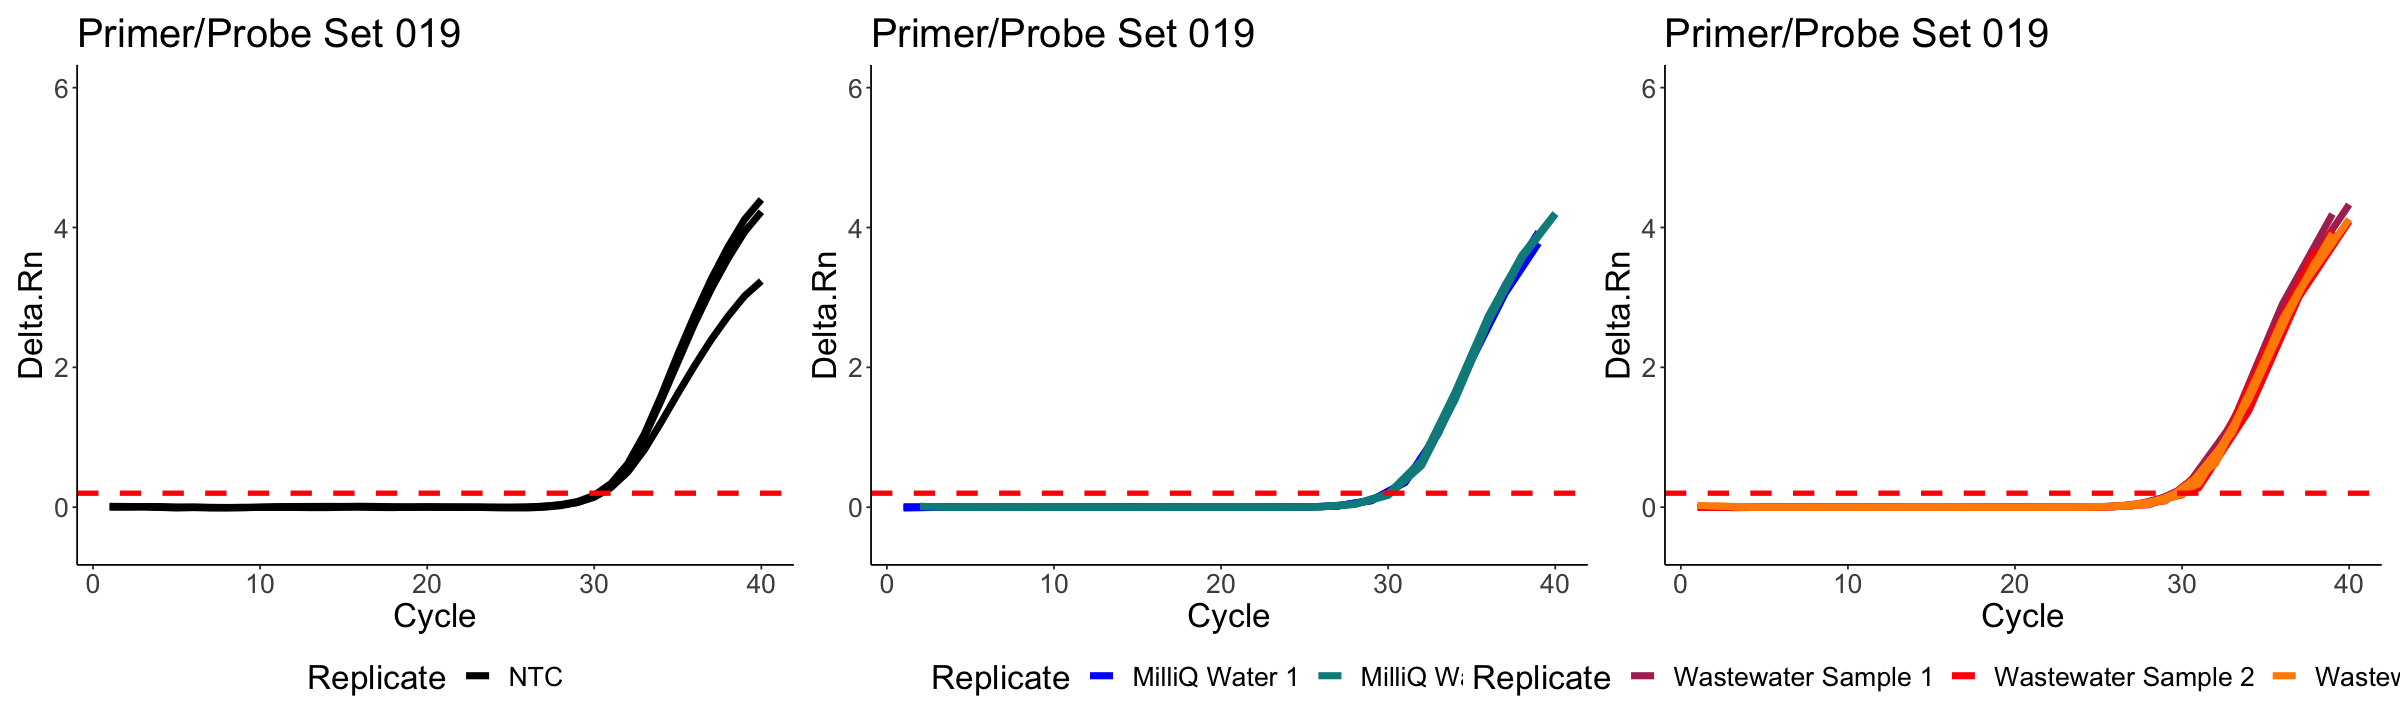

In [504]:
plot_019_milliQ <- curve_plot(data_018_019, 
                                         samples = c("Probe 019"),
                                                  replicates = c("MilliQ Water 1", "MilliQ Water 2"),
                                        colors = c("blue","cyan4"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 019",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,6))

plot_019_NTC <- curve_plot(data_018_019, 
                                         samples = c("Probe 019"),
                           replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 019",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,6))


plot_019_WW <- curve_plot(data_018_019, 
                                         samples = c("Probe 019"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 019",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,6))

plot_019_NTC + plot_019_milliQ + plot_019_WW

Probe 019 seems to have the worst amount of amplification, reaching values of 4 close to the end of 40 cycles, and also having $C_T$ values that are ~30 across all replicates in all conditions. It is possible that Probe 019 does indeed have some phagemid contamination, potentially in the mastermix.

In summary:
- The ranked amplification across primer-probe sets can be described as: probe 019 > probe 004 > probe 018 ~ probe 010 > probe 007
- Probe 019 and probe 004 both demonstrated amplification in the NTCs
- Probe 007 demonstrated no amplification in the NTCs
- Probe 018 and probe 010 demonstrated *some* amplification in the NTCs, but not across all replicates.

Our next step here would be to debug amplification in the NTCs; specifically, if we cannot reliably avoid amplification in the NTCs, the rest of the assay is suspect.

## 2022-11-17: Re-running controls with new primer/probe sets and mastermixes

**Experiment files**: 
- Plate layouts [here](https://docs.google.com/spreadsheets/d/19m2iW6PM-410qpUytBkb5La5U1Y47fgnDcRSqFZjxyw/edit)
- Raw data [2022-11-17 wastewater amplification](https://drive.google.com/drive/u/0/folders/1R_YeYyu7x4epFrs08Wr48nQRVRjuLl1N)


In this experiment, Laura ran two more plates.

Plate 1: 004 and 010 probes
- These are **new primer/probe sets (aka mastermixes)** ordered from Thermo Fisher
- Laura made 30 uL aliquots of these primer/probe mastermixes, and stored them in the -20C
- Not sure if we used fresh water and mastermix.

Plate 2: 018 and 018 probes
- These are the same primer/probe sets used in the 2022-11-04 experiment
- Replaced the nuclease-free water and the master mix with fresh/new reagents


In [513]:
plate_004_010 <- import_plate("data/2022-11-17-wastewater-amplification/plate_layout.xlsx",sheet=1)
plate_018_019 <- import_plate("data/2022-11-17-wastewater-amplification/plate_layout.xlsx",sheet=2)

data_004_010 <- amp_curves(plate_004_010,
                                    "data/2022-11-17-wastewater-amplification/2022-11-17-004-top-010-bottom.xls",
                                    skip_rows = 42)

data_018_019 <- amp_curves(plate_018_019,
                                    "data/2022-11-17-wastewater-amplification/2022-11-17-018-top-019-bottom.xls",
                                    skip_rows = 42)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


### Probe 004 (new primer/probe set, unclear if new water and mastermix)

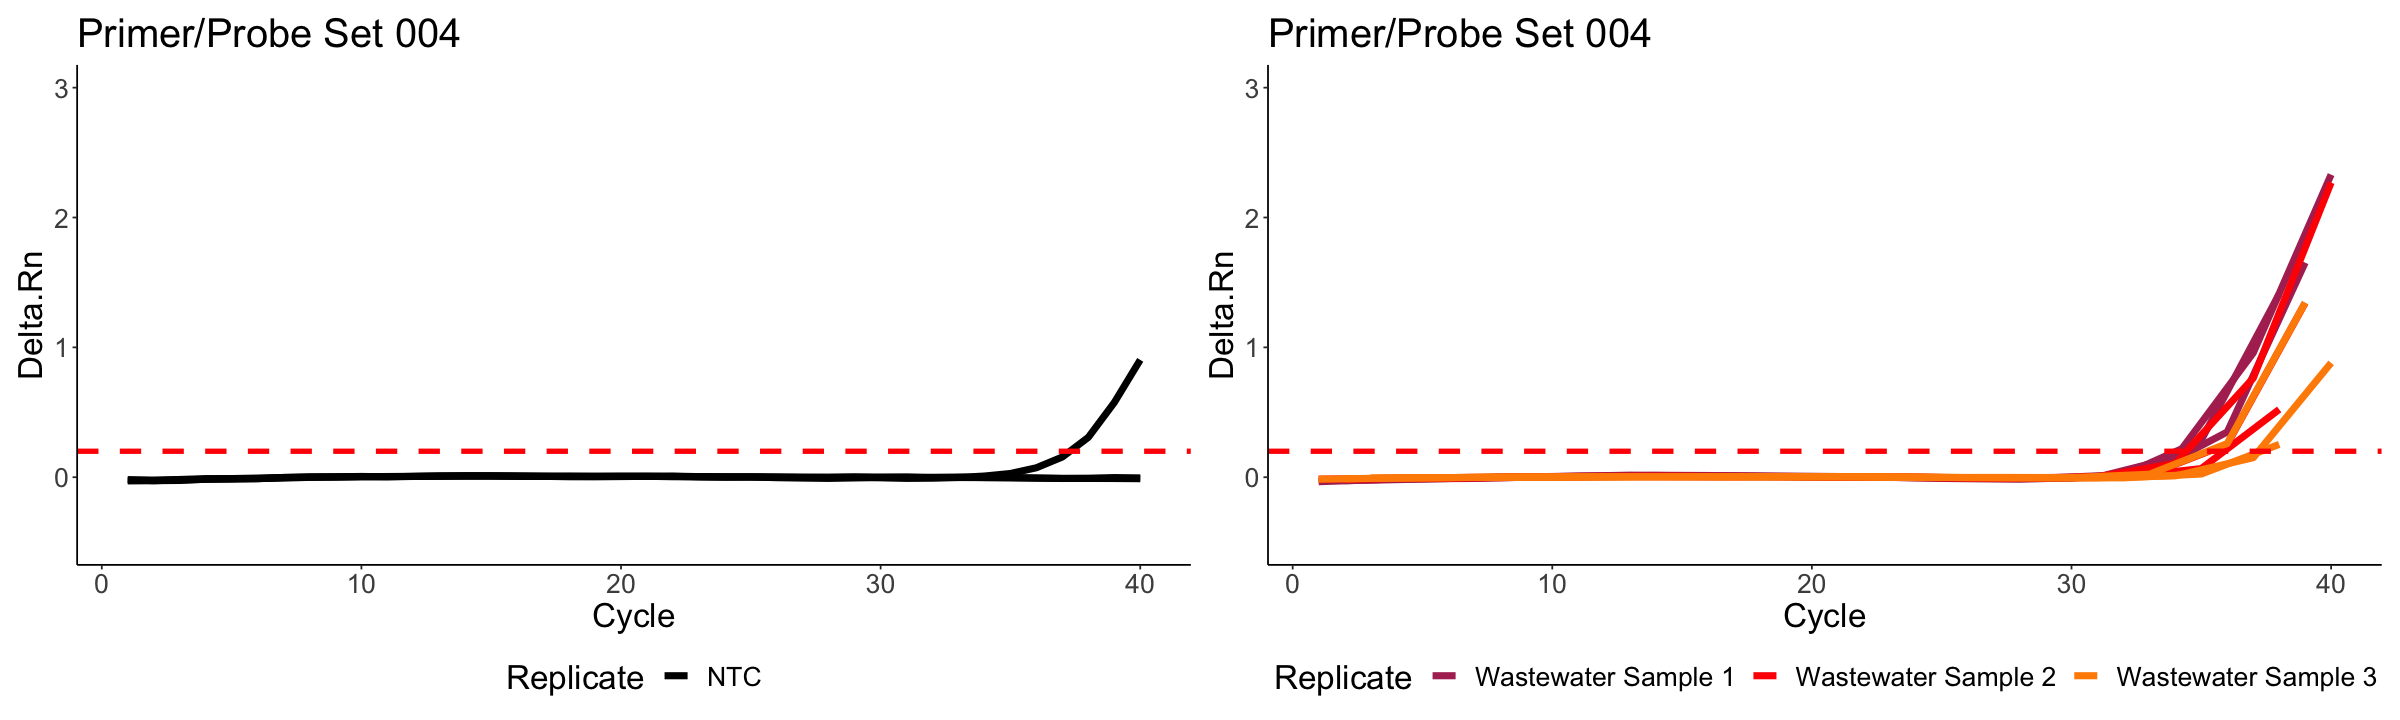

In [515]:
plot_004_NTC <- curve_plot(data_004_010, 
                                         samples = c("Probe 004"),
                                                  replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 004",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,3))


plot_004_WW <- curve_plot(data_004_010, 
                                         samples = c("Probe 004"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 004",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,3))

plot_004_NTC + plot_004_WW

Note that for probe set 004, there are 2 NTCs that show no amplification and 1 NTC that does. It is a bit difficult to discern this from the current plot.

## Probe 010 (new primer/probe set, unclear if new water and 2X mastermix)

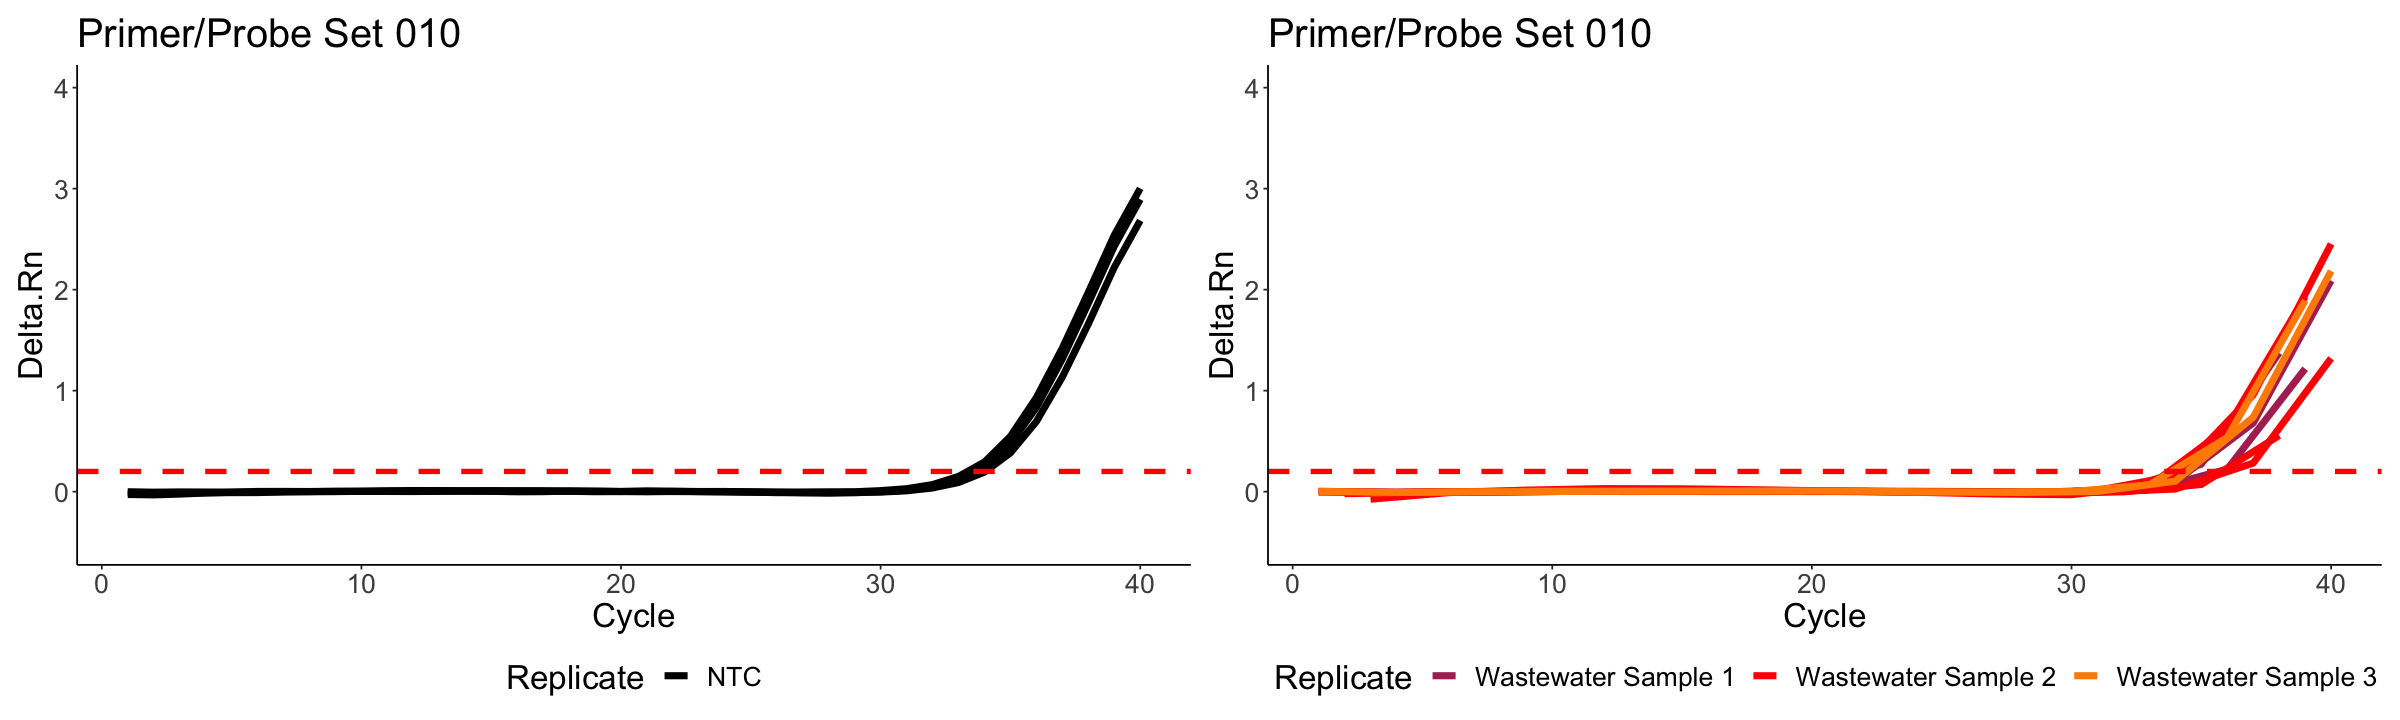

In [524]:
plot_010_NTC <- curve_plot(data_004_010, 
                                         samples = c("Probe 010"),
                                                  replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 010",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,4))


plot_010_WW <- curve_plot(data_004_010, 
                                         samples = c("Probe 010"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 010",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,4))

plot_010_NTC + plot_010_WW

Note that primer/probe set 010 looks worse here than it did with the original experiment from 2022-11-04.

### Probe 018 (old primer/probe set, new water, new 2X mastermix)

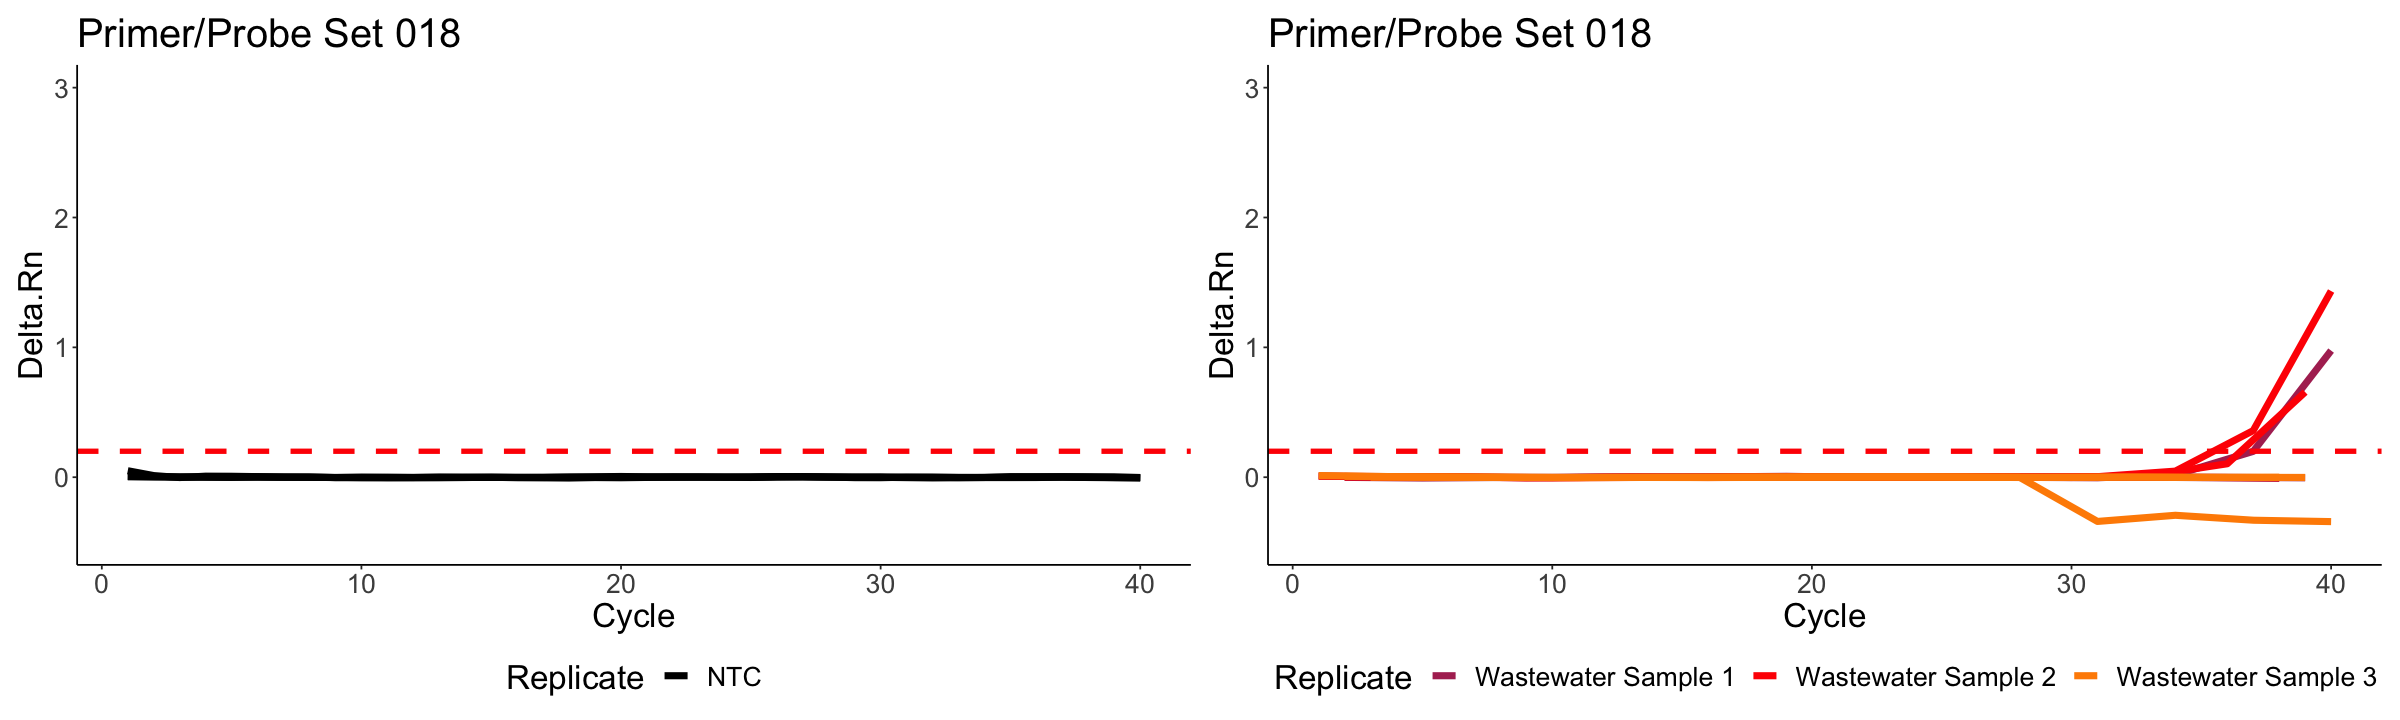

In [525]:
plot_018_NTC <- curve_plot(data_018_019, 
                                         samples = c("Probe 018"),
                                                  replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 018",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,3))


plot_018_WW <- curve_plot(data_018_019, 
                                         samples = c("Probe 018"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 018",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,3))

plot_018_NTC + plot_018_WW

The NTC for primer/probe set 018 seems good! But we are still seeing some amplification in the wastewater sample.

### Probe 019 (old primer/probe set, new water, new 2X mastermix)

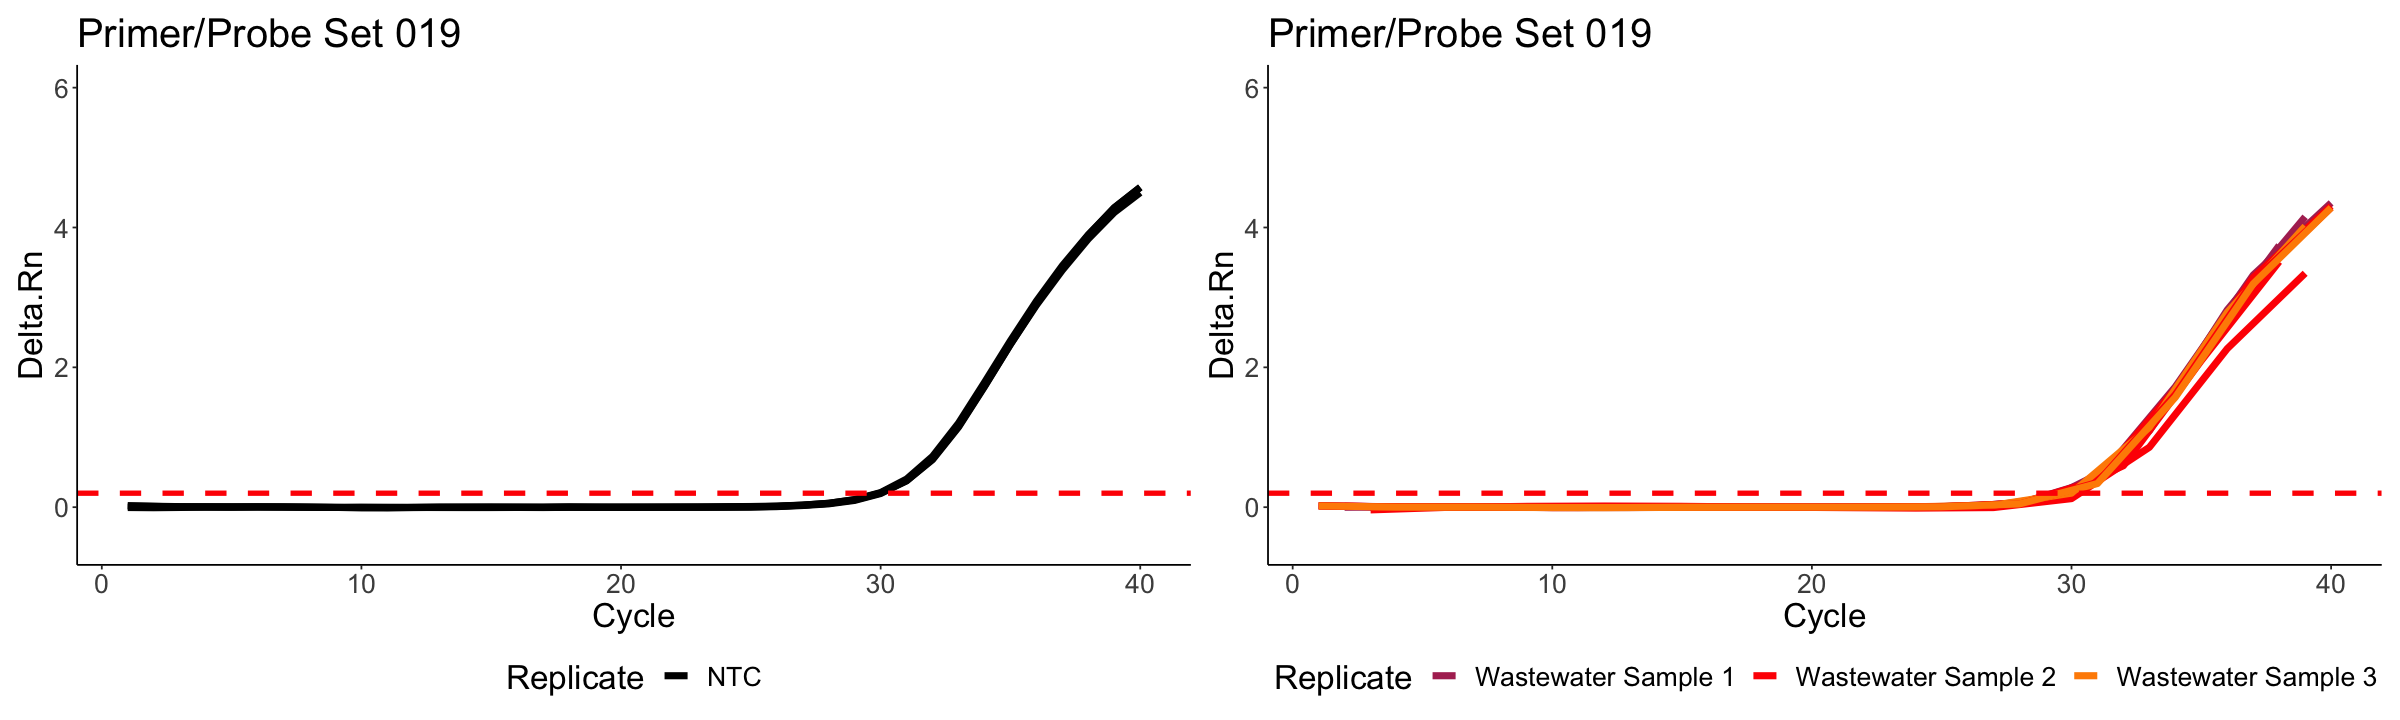

In [528]:
plot_019_NTC <- curve_plot(data_018_019, 
                                         samples = c("Probe 019"),
                                                  replicates = c("NTC"),
                                        colors = c("black"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 019",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,6))


plot_019_WW <- curve_plot(data_018_019, 
                                         samples = c("Probe 019"),
                       replicates = c("Wastewater Sample 1","Wastewater Sample 2","Wastewater Sample 3"),
                                        colors = c("maroon","red","darkorange"),
                                         plot_width = 20, plot_height = 6,
                                         linewidth = 2, 
                                         title = "Primer/Probe Set 019",
                                         legend_position = "bottom",
                                        threshold = 0.2, ylim=c(-0.5,6))

plot_019_NTC + plot_019_WW

Note that primer/probe set 019 still seems to have the worst amount of amplification consistently across all samples.

In summary:
- The ranked amplification for NTCs can roughly be described as probe 019 > probe 010 > probe 004 > probe 018
- All WW replicates seem to have some amount of amplification.

Next steps:
- Try sequencing the NTC and WW samples that demonstrated amplification.

## 2022-11-30: Nanopore Sequencing of 018 and 019 samples

On 11/30, we sequenced 3 nanopore samples, which were described in [this document](https://docs.google.com/document/d/11ful_SWJIV8wKq9F2YCU1gQo8ylP-z8DP9YoNlRRn0w/edit#heading=h.cg0syupxjjoj). We performed an additional 30-cycle PCR round on these samples, as described [here](https://docs.google.com/document/d/1_9WQtQwZHikBEelZ5YXpdXClgDhHOJtxanAgNSzM9Vc/edit).

Jeff performed some preliminary analysis of this on 2022-12-12 (see [here](https://docs.google.com/document/d/1tWn0mlu8M3Yv8Cg8TihLFjZwglV0sfoYWOe3m1bf2yI/edit)). We found that:
- the non-specific amplification for the 019 primer was likely from phagemid contamination
- however, for the 018 probe, we are still unclear what is causing the amplification
- notably, because these sequences were pooled with Ceili's samples, we did not collect enough reads in the WW case, only the NTC case
- therefore, we need to repeat sequencing

(Note: the experiments below were done after the sequencing, but before we received and analyzed the results. We analyzed results on 2022-12-12.)

## 2022-12-05: Non-specific amplification experiments with 20 uL volumes

Up until now, all of our reactions for this experiment has been in 10 uL volumes, which is what is suggested in the Taq-Man qPCR protocol, and what the 0.1 mL plates are suited to do. However, Laura tried running qPCRs for 20 uL reactions, based on the fact that we had previously run qPCRs at 20 uL volumes with success.

**Experiment files**: 
- Plate layouts [here](https://docs.google.com/spreadsheets/d/1-zYXN64POxBsQYTuG553vRhBaX-MqA0pGhj7iNMsT3M/edit)
- Raw data [2022-12-05-20uL-ntcs](https://drive.google.com/drive/u/0/folders/1A8f9FIRd7uIe8mTaIlx3pQIQTl8eS7lI)


In [529]:
plate_004_010_019 <- import_plate("data/2022-12-05-20uL-ntcs/plate_layout.xlsx",sheet=1)
plate_007_018 <- import_plate("data/2022-12-05-20uL-ntcs/plate_layout.xlsx",sheet=2)

data_004_010_019 <- amp_curves(plate_004_010_019,
                                    "data/2022-12-05-20uL-ntcs/2022-12-05-probe-004_010_019.xls",
                                    skip_rows = 42)

data_007_018 <- amp_curves(plate_007_018,
                                    "data/2022-12-05-20uL-ntcs/2022-12-05-probe-007_018.xls",
                                    skip_rows = 42)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


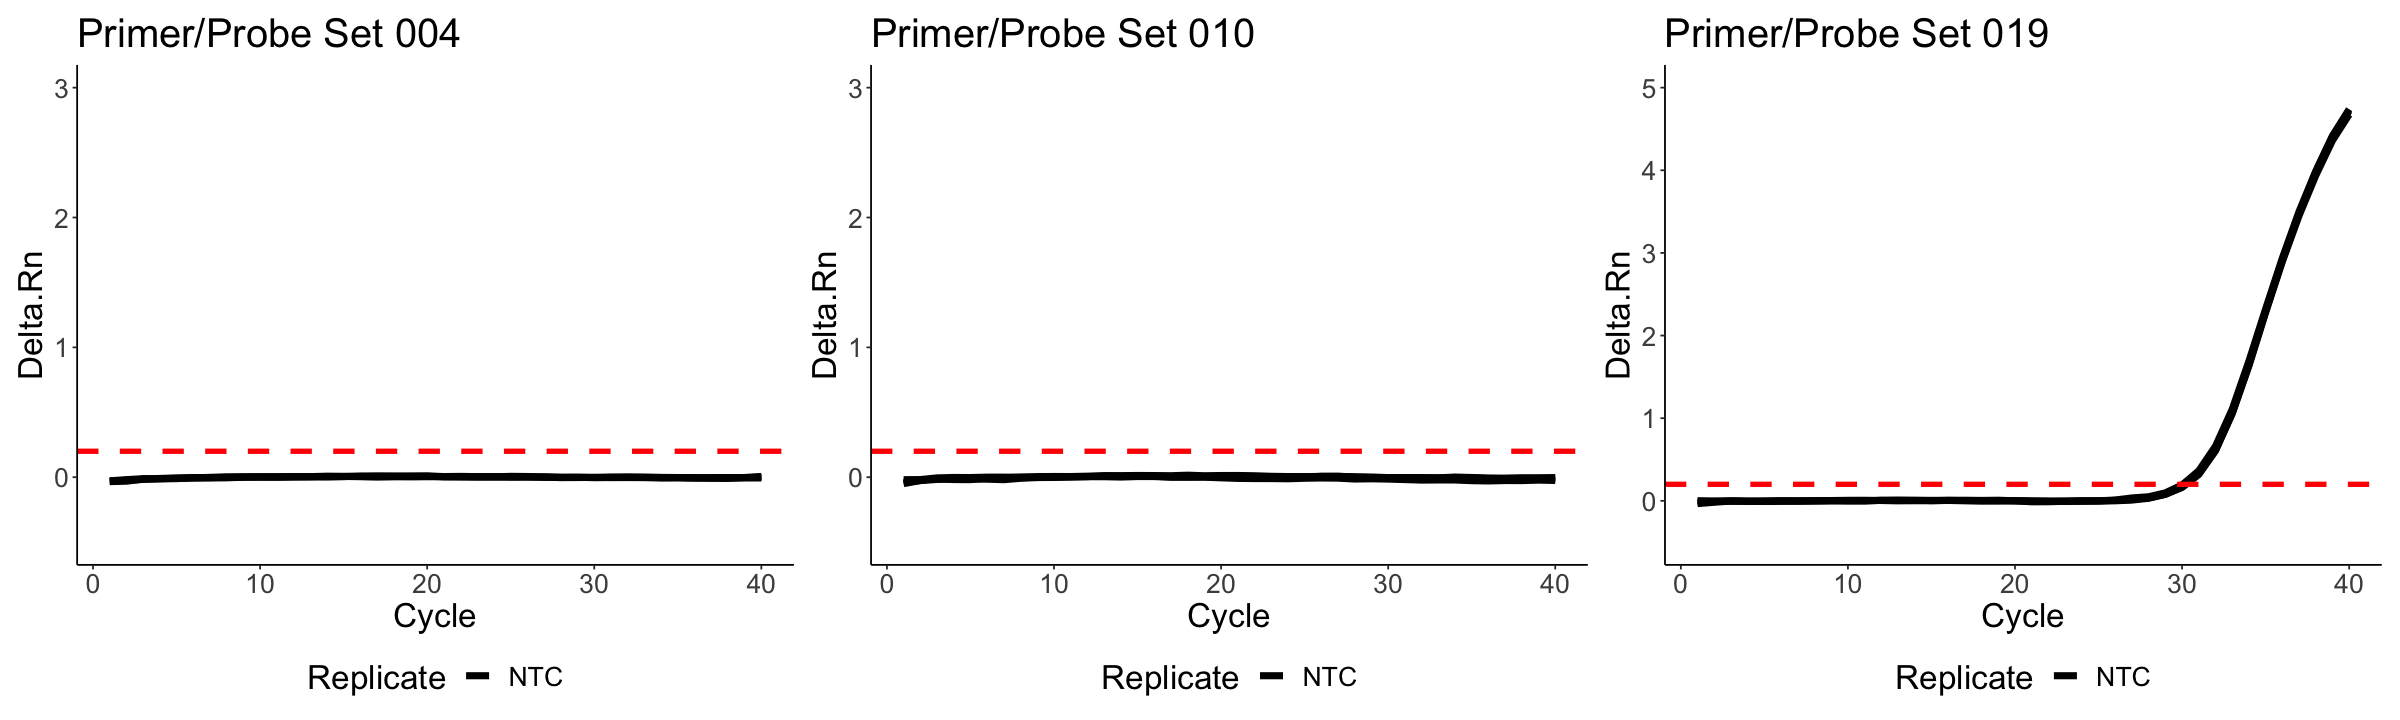

In [534]:
plot_004_NTC <- curve_plot(data_004_010_019, 
                         samples = c("Probe 004"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 20, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 004",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-0.5,3))

plot_010_NTC <- curve_plot(data_004_010_019, 
                         samples = c("Probe 010"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 20, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 010",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-0.5,3))


plot_019_NTC <- curve_plot(data_004_010_019, 
                         samples = c("Probe 019"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 20, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-0.5,5))


plot_004_NTC + plot_010_NTC + plot_019_NTC

(Note that the axes are still slightly different between probe set 019 and probe set 004/010, but we can see that the NTCs do not have significant amplification for 004 and 010 with the 20 uL volumes.)

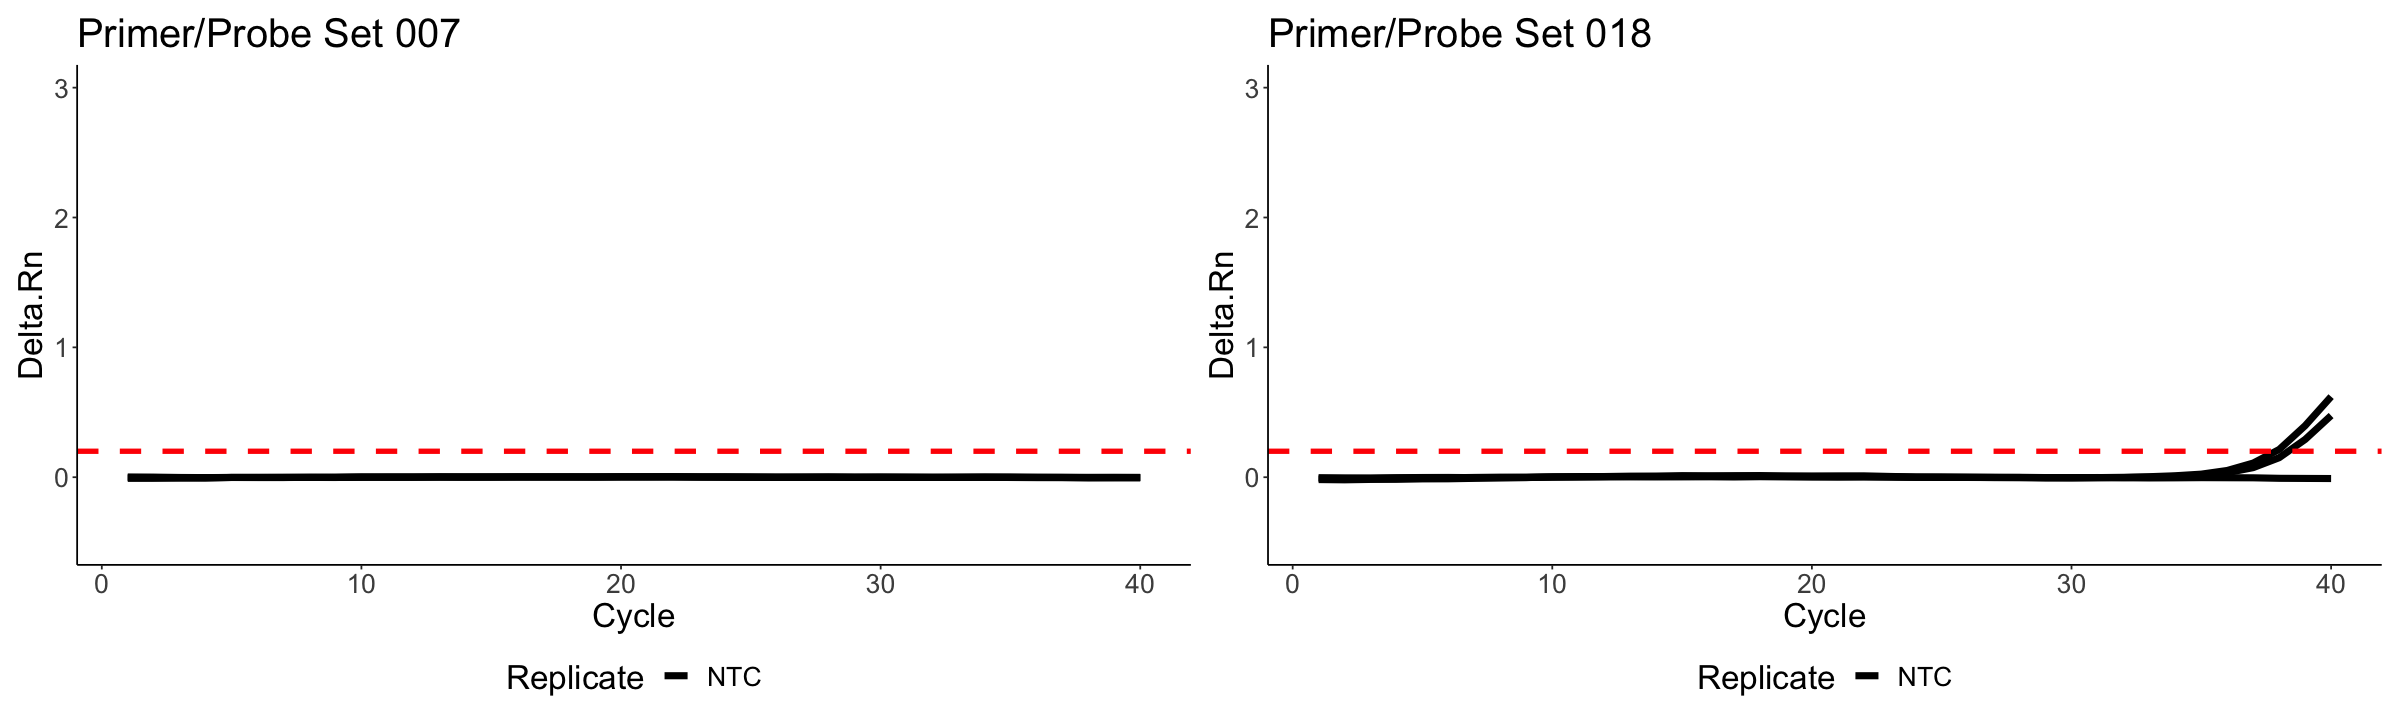

In [535]:
plot_007_NTC <- curve_plot(data_007_018, 
                         samples = c("Probe 007"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 20, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 007",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-0.5,3))

plot_018_NTC <- curve_plot(data_007_018, 
                         samples = c("Probe 018"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 20, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 018",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-0.5,3))


plot_007_NTC + plot_018_NTC

Summary:
- For probe sets 004, 010, and 007, moving to a 20 uL volume seems to significantly help with reducing amplification in the NTCs.
- For probe set 019, we are still seeing significant amplification, suggesting contamination
- For probe set 018, we are seeing some amplification, though not across all NTC replicates.

## 2022-12-06: Double-checking standard curves with 20 uL volumes

Since the 20 uL volumes from part 5 seemed to reduce non-specific amplification, we next tried to see if we can get linear amplification curves with the 20 uL volumes.

**Experiment files**: 
- Plate layouts [here](https://docs.google.com/spreadsheets/d/1QUOLw48RcNQ9s1izCONJns-DPTyDOKk7qaLrt1CmfqI/)
- Raw data [2022-12-05-20uL-ntcs](https://drive.google.com/drive/u/0/folders/1A8f9FIRd7uIe8mTaIlx3pQIQTl8eS7lI)

**Outstanding Question: Are the WW1, WW2, WW3 different _technical_ replicates or just _qPCR replicates_?**

In [650]:
plate_20221206 <- import_plate("data/2022-12-06-20uL-calibration-curves/plate_layout.xlsx",sheet=1)

New names:
• `` -> `...1`


In [651]:
plate_20221206 <- d2c_mapping("data/2022-12-06-20uL-calibration-curves/plate_layout_1_tabular.csv",
                              "data/2022-12-06-20uL-calibration-curves/dilution_map.xlsx")

### Calibration Curve for Primer/Probe set 004
For this set, Laura used DNA from the 004_BC71 phagemid.

In [652]:
sc_004_BC71 <- standard_curve(plate_20221206,
                                      spreadsheet="data/2022-12-06-20uL-calibration-curves/2022-12-06-qpcr.xls",
                                      sample="004_BC71", skip_rows=42)


Warning message in standard_curve(plate_20221206, spreadsheet = "data/2022-12-06-20uL-calibration-curves/2022-12-06-qpcr.xls", :
“NAs introduced by coercion”


In [653]:
sc_004_BC71

,Sample,Replicate,CT,Concentration,Well.Position
,<chr>,<chr>,<dbl>,<dbl>,<chr>
5,004_BC71,Dilution 1,36.58557,1,A2
6,004_BC71,Dilution 2,34.49680,2,A3
7,004_BC71,Dilution 3,31.75539,3,A4
8,004_BC71,Dilution 4,29.71408,4,A5
9,004_BC71,Dilution 5,26.88690,5,A6
10,004_BC71,Dilution 6,24.34901,6,A7
11,004_BC71,Dilution 7,21.74995,7,A8
16,004_BC71,Dilution 1,36.15173,1,B2
17,004_BC71,Dilution 2,34.36632,2,B3


Interestingly, C2 (which should have one of the most concentrated amounts of DNA) does not have any amplification. We can try to figure out what's happening here by plotting the curve.

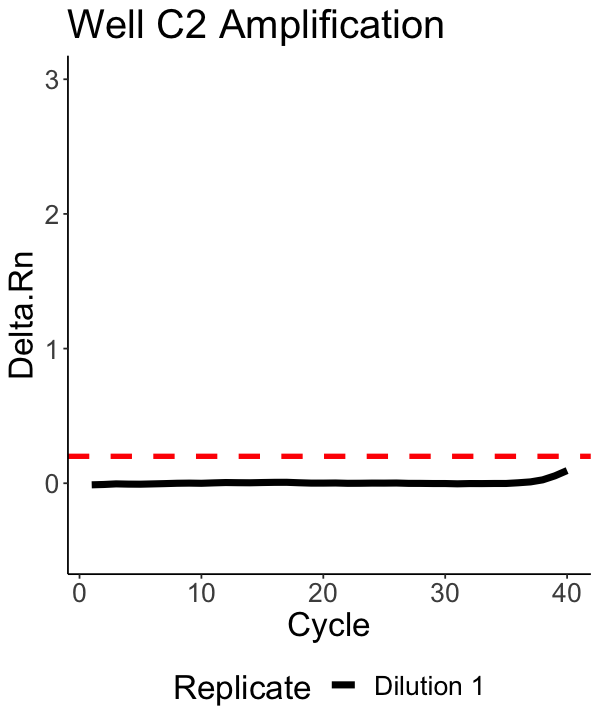

In [654]:
sc_004_BC71_amp_curves <- amp_curves(plate_20221206,
                                    "data/2022-12-06-20uL-calibration-curves/2022-12-06-qpcr.xls",
                                    skip_rows = 42)

C2_amplification <- list()
C2_amplification$amplification_data <- sc_004_BC71_amp_curves$amplification_data[sc_004_BC71_amp_curves$amplification_data$Well.Position == "C2",]

C2_plot <- curve_plot(C2_amplification, 
                         samples = c("004_BC71"),
                        colors = c("black"),
                         plot_width = 5, plot_height = 6,
                         linewidth = 2, 
                         title = "Well C2 Amplification",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-0.5,3))

C2_plot

Since the lack of amplification seems to be correct, we can drop this from our data frame. 

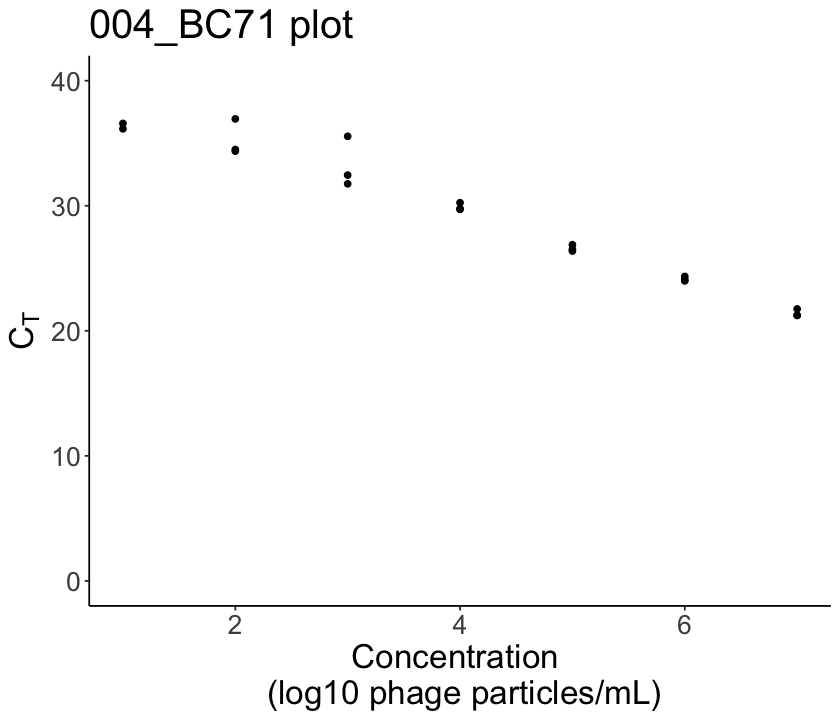

In [655]:
sc_004_BC71 <- drop_na(sc_004_BC71)

sc_004_BC71_plot <- standard_curve_plot(sc_004_BC71, 
                                        plot_width = 7, plot_height = 6, 
                                        title="004_BC71 plot", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

sc_004_BC71_plot <- sc_004_BC71_plot + ylim(0,40)

sc_004_BC71_plot

**TO-DO: Calculate R^2 value**

This looks mostly linear, though the $C_T$ values look very high. Not 100\% sure what's happening here.

Finally, let's look at the NTC and WW amplification curves for probe 004. Note that we have to start with dropping the "Concentration" value, or else it will throw some random warnings and errors.

In [656]:
amp_curves_20221206 <- amp_curves(plate_20221206,
                                    "data/2022-12-06-20uL-calibration-curves/2022-12-06-qpcr.xls",
                                    skip_rows = 42)

amp_curves_20221206$amplification_data <- within(amp_curves_20221206$amplification_data, rm("Concentration"))

amp_curves_20221206$amplification_data <- drop_na(amp_curves_20221206$amplification_data)

In [657]:
probe_004_NTC <- curve_plot(amp_curves_20221206, 
                         samples = c("Probe 004"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 004 (NTC)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-2,5))

In [658]:
probe_004_WW <- curve_plot(amp_curves_20221206, 
                         samples = c("Probe 004"),
                                  replicates = c("wastewater 1","wastewater 2","wastewater 3"),
                        colors = c("maroon","red","darkorange"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 004 (WW)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-2,5))


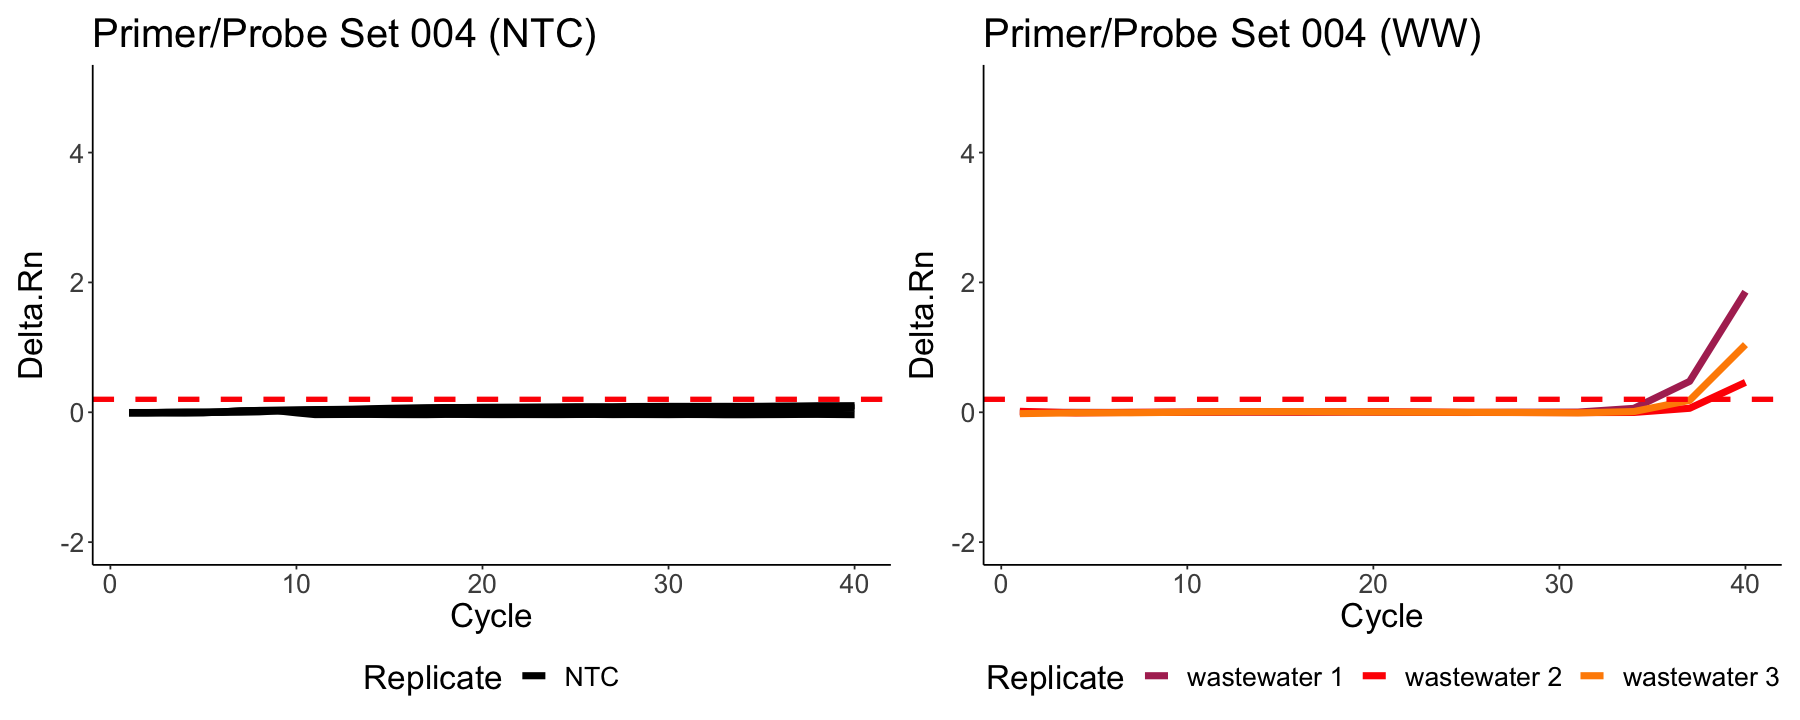

In [659]:
probe_004_NTC + probe_004_WW

Here we can see that despite there being no amplification in the NTC, we still see some amplification in the wastewater group.

### Calibration Curve for Primer/Probe set 019
For this primer/probe set, Laura used DNA from phagemid 019_BC15


In [660]:
sc_019_BC15 <- standard_curve(plate_20221206,
                                      spreadsheet="data/2022-12-06-20uL-calibration-curves/2022-12-06-qpcr.xls",
                                      sample="019_BC15", skip_rows=42)


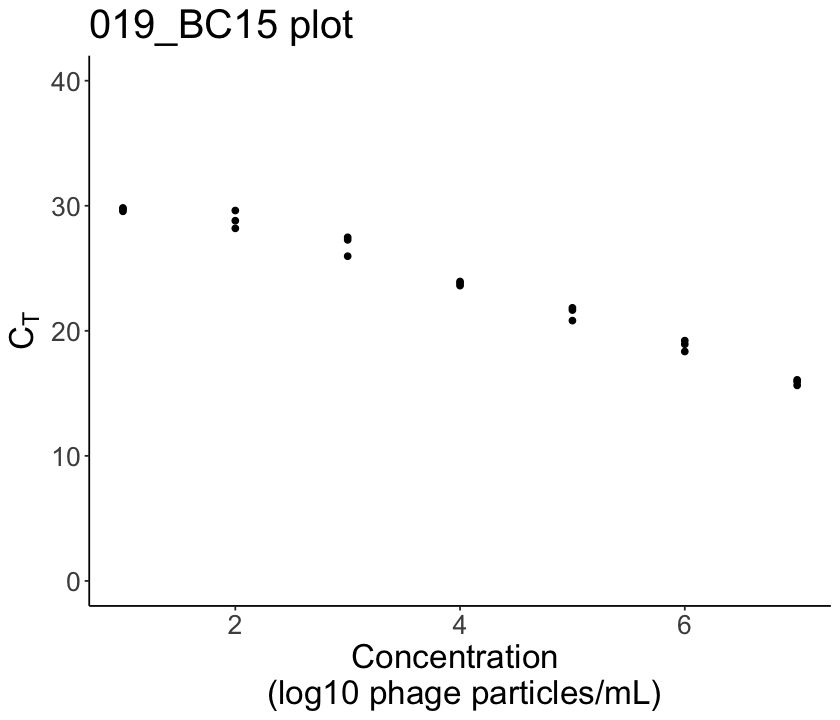

In [662]:
sc_019_BC15_plot <- standard_curve_plot(sc_019_BC15, 
                                        plot_width = 7, plot_height = 6, 
                                        title="019_BC15 plot", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

sc_019_BC15_plot <- sc_019_BC15_plot + ylim(0,40)

sc_019_BC15_plot

Without knowing the concentrations, it's unclear if either of these standard curves worked well. 

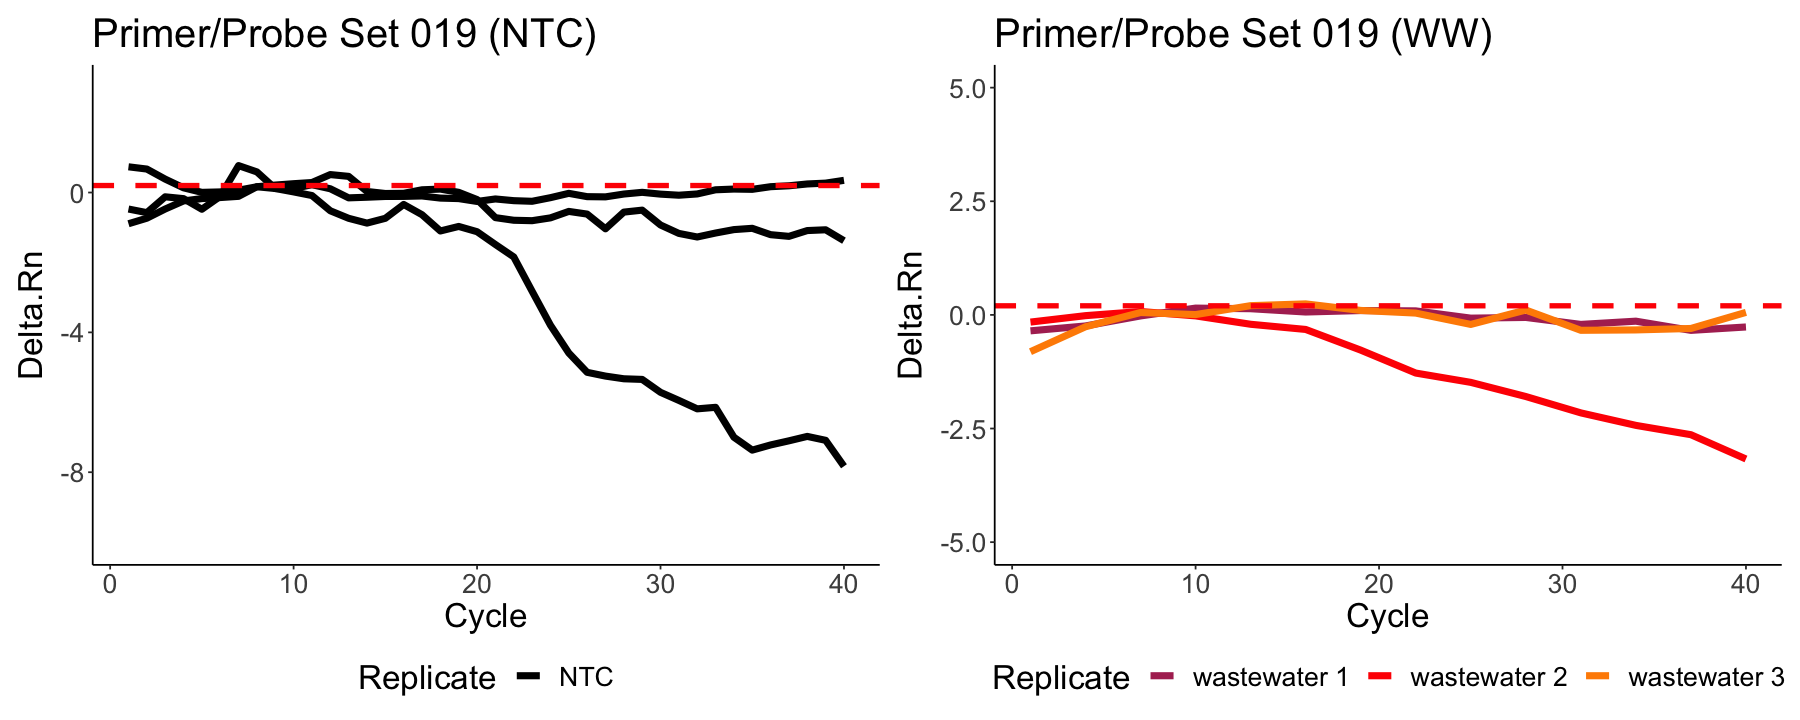

In [665]:
probe_019_NTC <- curve_plot(amp_curves_20221206, 
                         samples = c("Probe 019"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019 (NTC)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-10,3))

probe_019_WW <- curve_plot(amp_curves_20221206, 
                         samples = c("Probe 019"),
                                  replicates = c("wastewater 1","wastewater 2","wastewater 3"),
                        colors = c("maroon","red","darkorange"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019 (WW)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-5,5))

probe_019_NTC + probe_019_WW

It's unclear what ended up happening here... this seems quite odd.

### NTC and WW amplification for Primer/Probe Set 18

Laura also re-ran the NTC and wastewater curves for primer/probe set 018.


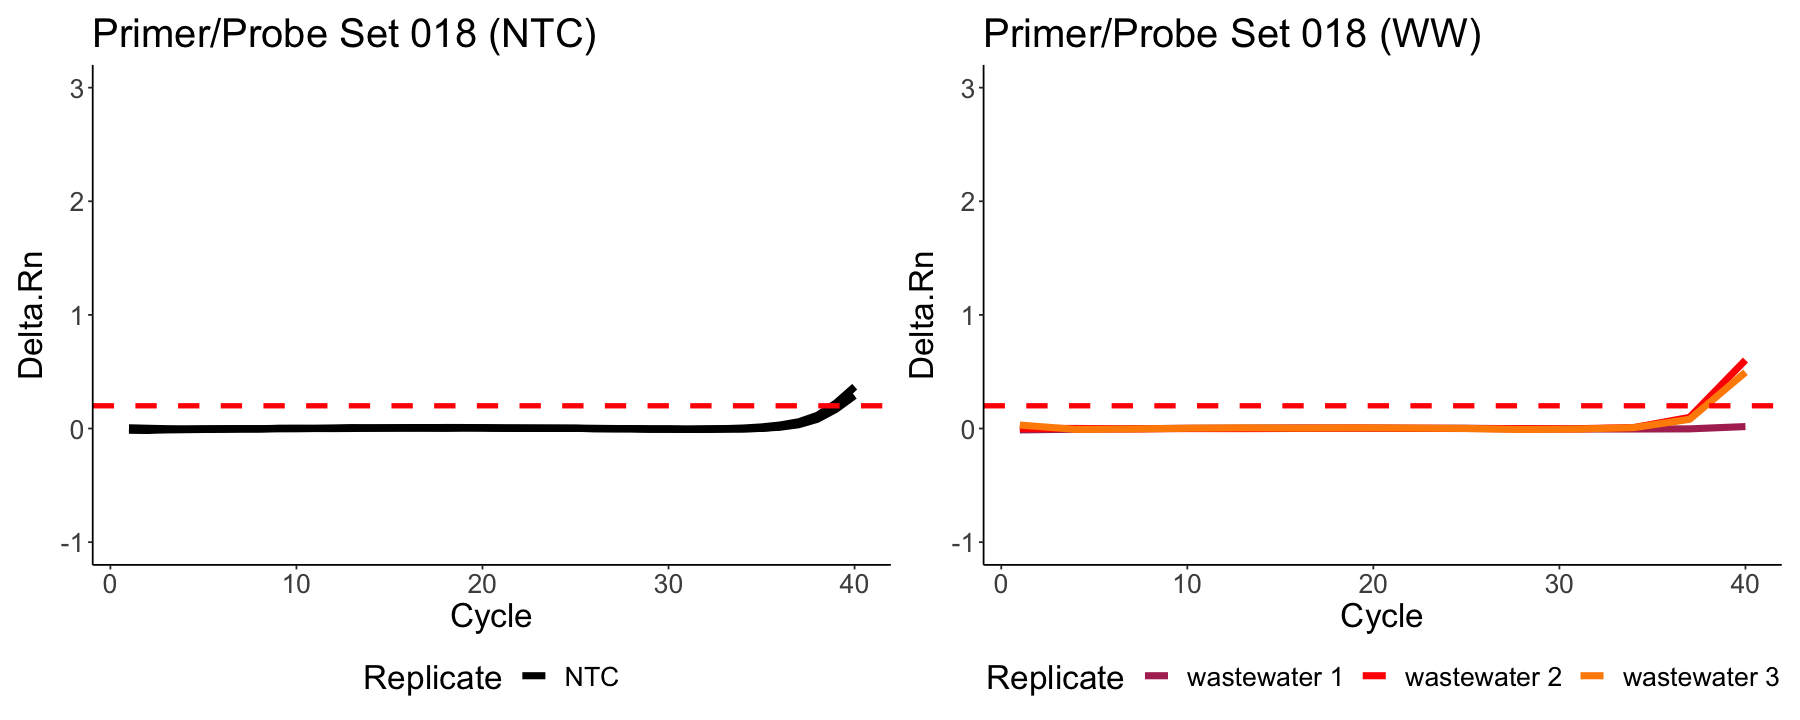

In [667]:
probe_018_NTC <- curve_plot(amp_curves_20221206, 
                         samples = c("Probe 018"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 018 (NTC)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,3))

probe_018_WW <- curve_plot(amp_curves_20221206, 
                         samples = c("Probe 018"),
                                  replicates = c("wastewater 1","wastewater 2","wastewater 3"),
                        colors = c("maroon","red","darkorange"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 018 (WW)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,3))

probe_018_NTC + probe_018_WW

It looks like primer/probe set 018 still has some issues. I think we may not have gotten primer/probe set 018 replaced.

## 2022-12-14: NTC and WW on new Probe 019

We received a new round of probe 019 from Thermo Fisher on 2022-12-13 and Laura performed a new round of qPCR on 2022-12-14. Note that this is called "V3" because there were two other Probe 019 mastermixes that we had ordered from Thermo Fisher previously.

**Experiment files**: 
- Plate layouts [here](https://docs.google.com/spreadsheets/d/1FBfpMUuU1Zf8uLbq7lZb4grdOfLJlujfN8vWyBXFFIY/edit)
- Raw data [2022-12-14-20uL-probe-019-v3](https://drive.google.com/drive/u/0/folders/1BKuysQ1ETyZVlmXXPMB_YMgyx-3-KfKh)

**Outstanding Question: Are the WW1, WW2, WW3 different _technical_ replicates or just _qPCR replicates_?**

In [668]:
plate_20221214 <- import_plate("data/2022-12-14-20uL-probe-019-v3/plate_layout.xlsx",sheet=1)

New names:
• `` -> `...1`


In [669]:
amp_curves_20221214 <- amp_curves(plate_20221214,
                                    "data/2022-12-14-20uL-probe-019-v3/2022-12-14-20uL-probe-019-v3.xls",
                                    skip_rows = 42)

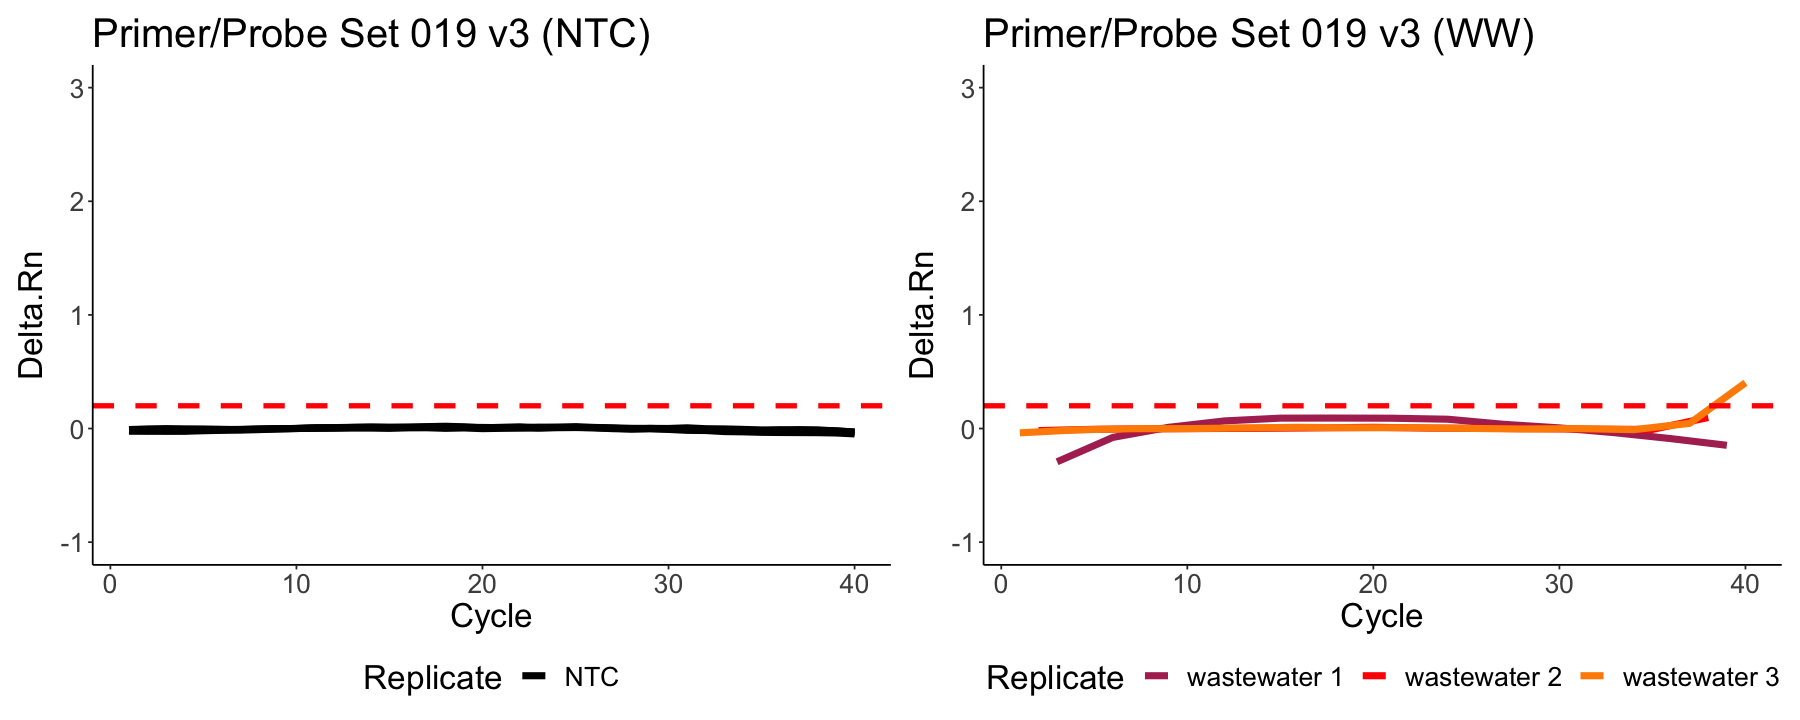

In [671]:
probe_019_NTC <- curve_plot(amp_curves_20221214, 
                         samples = c("Probe 019"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019 v3 (NTC)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,3))

probe_019_WW <- curve_plot(amp_curves_20221214, 
                         samples = c("Probe 019"),
                                  replicates = c("wastewater 1","wastewater 2","wastewater 3"),
                        colors = c("maroon","red","darkorange"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019 v3 (WW)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,3))

probe_019_NTC + probe_019_WW

We can see that switching the mastermix seems to fix the NTC and WW amplification for Probe 019.

## 2022-12-15: Standard Curve on 010_BC28 DNA

Laura performed two standard curve experiments, using 20 uL volumes. This includes:
- Standard curve with 010_BC28 DNA for probe 010
- Standard curve with 010_BC28 DNA for probe 019 (to check if we get a similar type of standard curve) 
- Not sure if wastewater 1, 2, 3 are qPCR replicates or technical replicates (or when these were extracted) 

**Experiment files**: 
- Plate layouts [here](https://docs.google.com/spreadsheets/d/1jmHWrXyD7BwmbX-hGDDGO8V4aaSORbsyuXPaWwfQpMI/edit)
- Raw data [2022-12-15-019-010-standard-curves](https://drive.google.com/drive/u/0/folders/19k-FNf5o5QVFEnrcD4eeswVxA2N_6Dyh)

**Outstanding Question: Are the WW1, WW2, WW3 different _technical_ replicates or just _qPCR replicates_?**

In [676]:
plate_010_20221215 <- import_plate("data/2022-12-15-019-010-standard-curve/plate_layout.xlsx",sheet=1)
plate_019_20221215 <- import_plate("data/2022-12-15-019-010-standard-curve/plate_layout.xlsx",sheet=2)

plate_010_20221215 <- d2c_mapping(plate_010_20221215,
                              "data/2022-12-15-019-010-standard-curve/dilution_map.xlsx")
plate_019_20221215 <- d2c_mapping(plate_019_20221215,
                              "data/2022-12-15-019-010-standard-curve/dilution_map.xlsx")

New names:
• `` -> `...1`
New names:
• `` -> `...1`


### Standard Curve of 010_BC28 with Probe/Primer Set 010

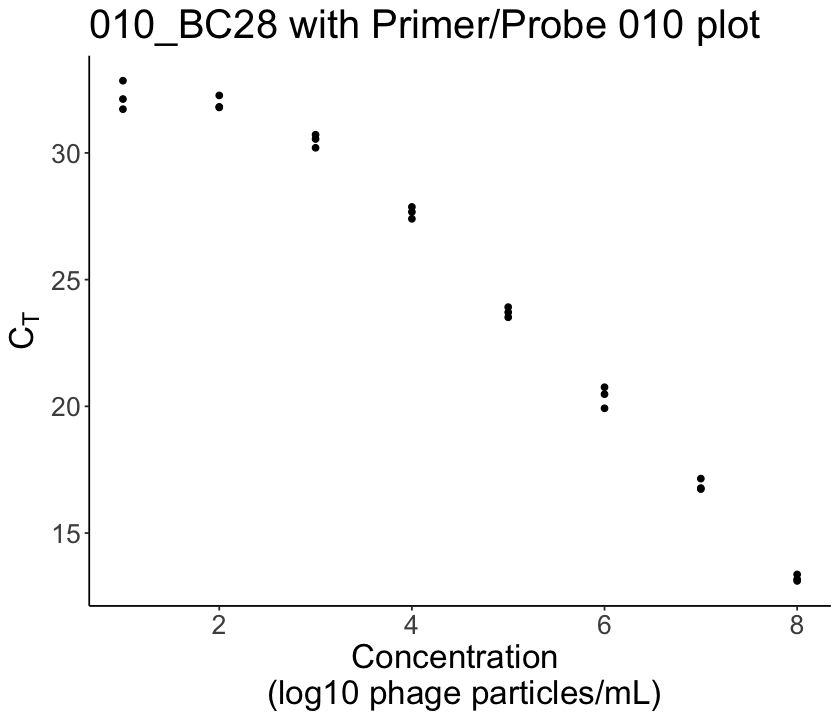

In [683]:
sc_010 <- standard_curve(plate_010_20221215,
                                      spreadsheet="data/2022-12-15-019-010-standard-curve/2022-12-15-010-curve.xls",
                                      sample="010_BC28", skip_rows=42)

sc_010_plot <- standard_curve_plot(sc_010, 
                                        plot_width = 7, plot_height = 6, 
                                        title="010_BC28 with Primer/Probe 010 plot", 
                                        xlabel="Concentration \n (log10 phage particles/mL)")

sc_010_plot

It seems like this calibration curve is also starting to taper off at the larger concentrations.

We can also see what the amplification curves look like for NTCs:

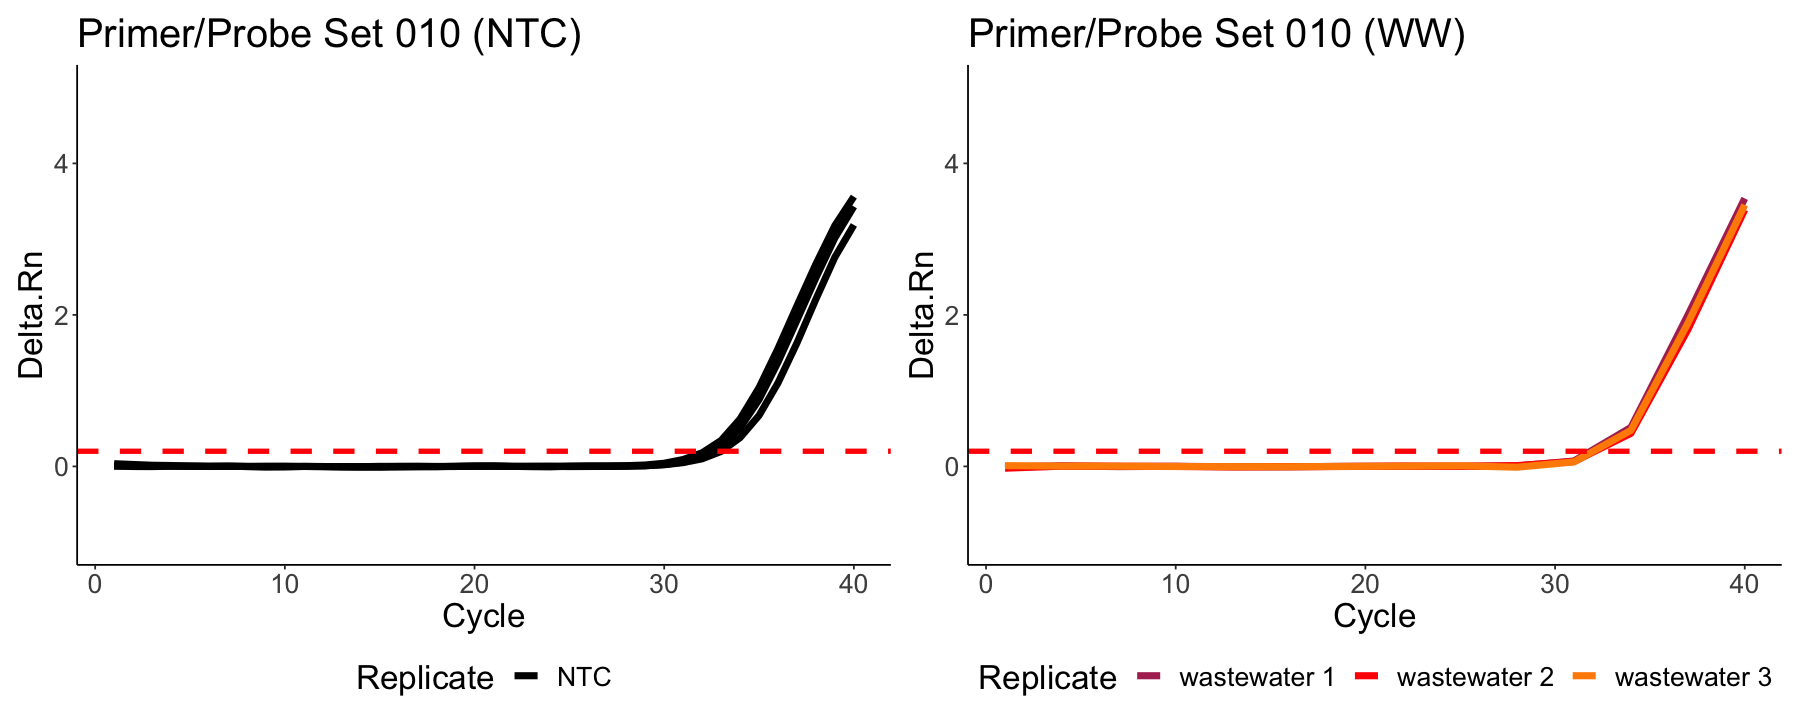

In [704]:
amp_curve_010 <- amp_curves(plate_010_20221215,
                                    "data/2022-12-15-019-010-standard-curve/2022-12-15-010-curve.xls",
                                    skip_rows = 42)

# amp_curve_010$amplification_data <- within(amp_curve_010$amplification_data, rm("Concentration"))

# amp_curve_010$amplification_data <- drop_na(amp_curve_010$amplification_data)

probe_010_NTC <- curve_plot(amp_curve_010, 
                         samples = c("Probe 010"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 010 (NTC)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,5))

probe_010_WW <- curve_plot(amp_curve_010, 
                         samples = c("Probe 010"),
                                  replicates = c("wastewater 1","wastewater 2","wastewater 3"),
                        colors = c("maroon","red","darkorange"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 010 (WW)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,5))

probe_010_NTC + probe_010_WW

### Standard Curve of 010_BC28 with Probe/Primer Set 019

In [697]:
sc_019 <- standard_curve(plate_019_20221215,
                                      spreadsheet="data/2022-12-15-019-010-standard-curve/2022-12-15-019-curve.xls",
                                      sample="010_BC28", skip_rows=42)

Warning message in standard_curve(plate_019_20221215, spreadsheet = "data/2022-12-15-019-010-standard-curve/2022-12-15-019-curve.xls", :
“NAs introduced by coercion”


In [698]:
sc_019

,Sample,Replicate,CT,Concentration,Well.Position
,<chr>,<chr>,<dbl>,<dbl>,<chr>
2,010_BC28,Dilution 8,36.06354,8,A10
4,010_BC28,Dilution 1,NA,1,A3
5,010_BC28,Dilution 2,NA,2,A4
6,010_BC28,Dilution 3,NA,3,A5
7,010_BC28,Dilution 4,NA,4,A6
8,010_BC28,Dilution 5,NA,5,A7
9,010_BC28,Dilution 6,NA,6,A8
10,010_BC28,Dilution 7,NA,7,A9
12,010_BC28,Dilution 8,37.79141,8,B10


Here, we can see that it's only the $10^8$ values that actually have any amplification. We can see what these curves actually look like:

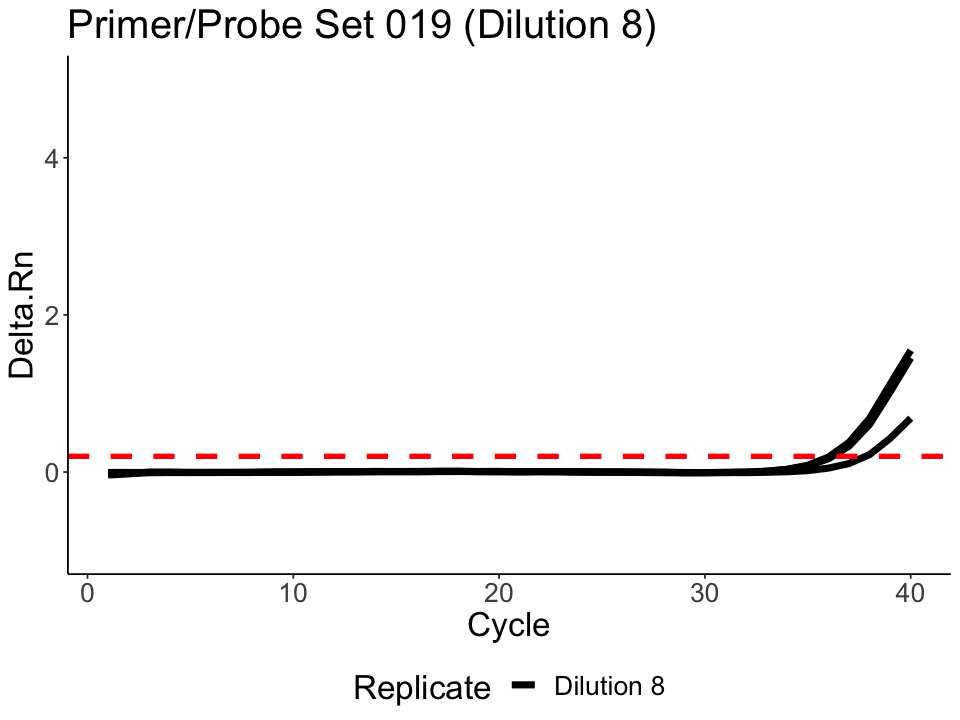

In [700]:
amp_curve_019 <- amp_curves(plate_019_20221215,
                                    spreadsheet="data/2022-12-15-019-010-standard-curve/2022-12-15-019-curve.xls",
                                    skip_rows = 42)

# amp_curve_010$amplification_data <- within(amp_curve_010$amplification_data, rm("Concentration"))

# amp_curve_010$amplification_data <- drop_na(amp_curve_010$amplification_data)

probe_019_NTC <- curve_plot(amp_curve_019, 
                         samples = c("010_BC28"),
                                  replicates = c("Dilution 8"),
                        colors = c("black"),
                         plot_width = 8, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019 (Dilution 8)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,5))

probe_019_NTC

We can also see what the NTC looks like: 

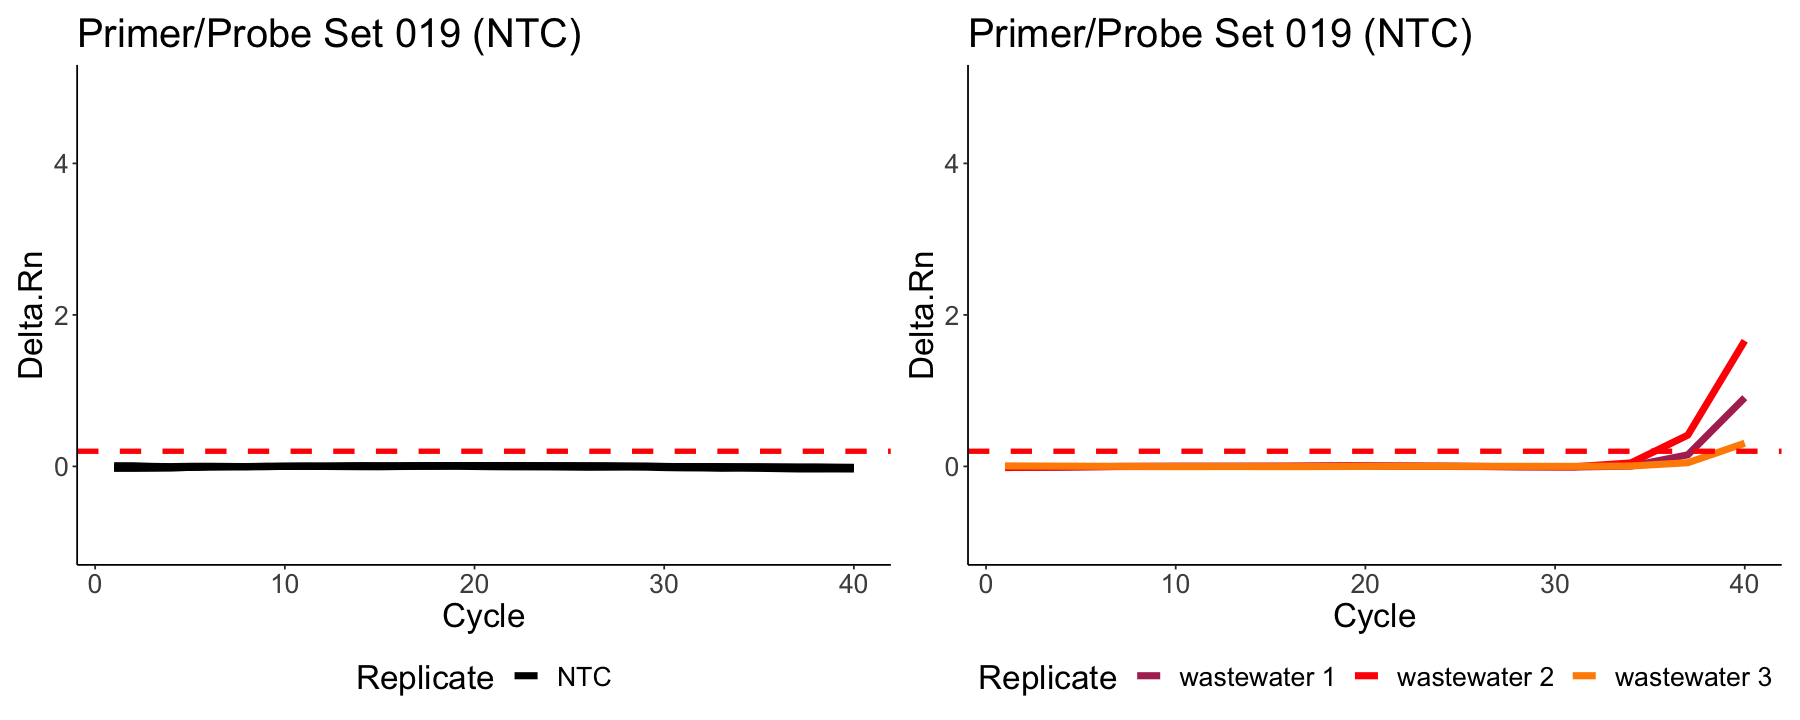

In [703]:
amp_curve_019 <- amp_curves(plate_019_20221215,
                                    spreadsheet="data/2022-12-15-019-010-standard-curve/2022-12-15-019-curve.xls",
                                    skip_rows = 42)

probe_019_NTC <- curve_plot(amp_curve_019, 
                         samples = c("Probe 019"),
                                  replicates = c("NTC"),
                        colors = c("black"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019 (NTC)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,5))

probe_019_WW <- curve_plot(amp_curve_019, 
                         samples = c("Probe 019"),
                                  replicates = c("wastewater 1","wastewater 2","wastewater 3"),
                        colors = c("maroon","red","darkorange"),
                         plot_width = 15, plot_height = 6,
                         linewidth = 2, 
                         title = "Primer/Probe Set 019 (NTC)",
                         legend_position = "bottom",
                        threshold = 0.2, ylim=c(-1,5))

probe_019_NTC + probe_019_WW

Summary:
- We can see some amount of amplification in the 010 primer/probe pair -- this might actually just up being contamination, and we should probably check whether there's any additional processes we can perform here to reduce this.
- Probe 019 does not seem to have any amplification in the NTC but does in the wastewater samples. Probe 010 has amplification in both the wastewater samples and the NTC.

## 2022-12-20: Sequencing of 20 uL probe 019, WW sample

Laura sequenced a 20-uL qPCR reaction that contained the 019 probe (version 3 / newly ordered / first time use) + 2 uL of extracted DNA from wastewater at a concentration of 2.19 ng/uL. The sample was not amplified with PCR prior to submission. It was sequenced on the Flongle by Summer, and returned ~18,000 reads. 

Jeff mentioned that:
- I count 12 reads matching the fwd primer, 2097 matching the reverse, and one matching both.  I think the one matching both is a primer dimer: TGCTTCGTTCAGTTACGTATTGCTcacagtaatccctggttccttttggaagtgacggtgtatcagagaGCAATACG
- There are no reads matching the probe sequence.